In [1]:
# import lib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2012 = pd.read_csv('2012_Data.csv', encoding='latin1', low_memory=False)
df_2013 = pd.read_csv('2013_Data.csv', encoding='latin1', low_memory=False)

In [3]:
# Concatenate the two DataFrames
merged_data = pd.concat([df_2012, df_2013], ignore_index=True)

# Display the first few rows of the merged data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   fiscal_year               int64  
 2   fiscal_month              int64  
 3   calendar_year             int64  
 4   calendar_month            int64  
 5   calendar_day              int64  
 6   company_code              int64  
 7   customer_code             object 
 8   customer_district_code    int64  
 9   item_code                 object 
 10  business_area_code        object 
 11  item_group_code           object 
 12  item_class_code           object 
 13  item_type                 int64  
 14  bonus_group_code          object 
 15  environment_group_code    object 
 16  technology_group_code     object 
 17  commission_group_code     object 
 18  reporting_classification  object 
 19  light_source              object 
 20  warehouse_code          

# Data Cleaning

1. Handling Missing Values
- Identifying Missing Data: Determine where missing values occur and why (e.g., data entry errors, collection issues).
- Strategies for Handling Missing Data:
    - Removal: Drop rows or columns with excessive missing values if they don’t significantly affect the analysis.
    - Imputation: Replace missing values using techniques like mean, median, mode, or more sophisticated methods (e.g., regression or k-nearest neighbors).
2. Correcting Inconsistent Data
- Fix inconsistencies in data entries (e.g., different formats for the same value, such as "USA" and "United States").
- Standardize formats for dates, phone numbers, and other data types.
3. Removing Duplicates
- Identify and remove duplicate records, which can skew analysis results and lead to incorrect conclusions.
4. Handling Outliers
- Outliers can distort analysis, especially in statistical modeling. Identify them using visualization techniques (e.g., boxplots).
- Decide whether to remove, transform, or keep outliers based on the context and goals of the analysis.
5. Data Type Conversion
- Ensure that each column has the appropriate data type (e.g., numeric, categorical, datetime).
- Convert data types if needed (e.g., parsing date strings into datetime objects).
6. Normalization and Scaling
- Normalization: Rescale numerical data to fit within a particular range, often [0, 1].
- Standardization: Adjust the data to have a mean of zero and a standard deviation of one, which is important for certain machine learning algorithms.
7. Handling Categorical Variables
- Convert categorical variables to numeric form if required for analysis (e.g., one-hot encoding).
- Combine similar categories to reduce complexity (e.g., grouping rare categories together).
8. Feature Engineering
- Creating New Features: Generate new variables based on existing ones to capture additional insights.
- Dropping Irrelevant Features: Remove features that do not add value or are highly correlated, to avoid multicollinearity.
9. Text Cleaning (for Textual Data)
- For textual data, cleaning involves removing punctuation, converting to lowercase, removing stopwords, and stemming or lemmatizing words to bring them to their root form.

## 1. Handling Missing Values
- Identifying Missing Data: Determine where missing values occur and why (e.g., data entry errors, collection issues).
- Strategies for Handling Missing Data:
    - Removal: Drop rows or columns with excessive missing values if they don’t significantly affect the analysis.
    - Imputation: Replace missing values using techniques like mean, median, mode, or more sophisticated methods (e.g., regression or k-nearest neighbors).

In [7]:
# check the length of data and rows.
merged_data.shape

(1988382, 41)

In [8]:
# indentifying the null values.
merged_data.isnull().sum()

accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
order_type_code             

The null values are shown in column 'item_source_class', which is 1,988,382, the same as the normal data length. This means this column does not use, so we decided to remove  it.

In [10]:
# remove null values.
merged_data.drop('item_source_class', axis=1, inplace=True)

In [11]:
# recheck null value after remove
merged_data.isnull().sum()

accounting_date             0
fiscal_year                 0
fiscal_month                0
calendar_year               0
calendar_month              0
calendar_day                0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity              0
value_price_adjustment      0
currency  

We expected that each row in each column would be unique, as each row represents a specific order item from a customer. If there are duplicate rows in any column, it could indicate an issue with data accuracy.

In [13]:
# check the length of data and rows.
merged_data.shape

(1988382, 40)

## 2. Correcting Inconsistent Data
- Fix inconsistencies in data entries (e.g., different formats for the same value, such as "USA" and "United States").
- Standardize formats for dates, phone numbers, and other data types.

First, we want to check whether the accounting date, fiscal year, and calendar year are consistent. However, the accounting date is not in the same standardised format as the others, so we will convert it to match the same format before checking consistency.

In [16]:
# Convert 'accounting_date' to datetime format
merged_data['accounting_date'] = pd.to_datetime(merged_data['accounting_date'], format='%Y%m%d')

# Create separate columns for year, month, and day from the datetime object
merged_data['accounting_year'] = merged_data['accounting_date'].dt.year
merged_data['accounting_month'] = merged_data['accounting_date'].dt.month
merged_data['accounting_day'] = merged_data['accounting_date'].dt.day

# Display the first few rows to verify the results
merged_data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,accounting_year,accounting_month,accounting_day
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,AUD,2217887,1,20120509,2865354,20120509,49:58.7,2012,5,9
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,AUD,2185745,1,20120216,2833515,20120216,49:58.7,2012,2,16
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,AUD,2217807,1,20120509,2864857,20120508,49:58.7,2012,5,9
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,AUD,2222758,1,20120518,2869759,20120518,49:58.7,2012,5,18
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,AUD,2170374,1,20120109,2819189,20120109,49:58.7,2012,1,9


Now, there are new columns: 'accounting_year', 'accounting_month', and 'accounting_day'. We will use these columns to check for consistency.

In [18]:
# Sort and print unique values in ascending order for calendar year, month, and day
print("Calendar Year:", sorted(merged_data['calendar_year'].unique()))
print("Calendar Month:", sorted(merged_data['calendar_month'].unique()))
print("Calendar Day:", sorted(merged_data['calendar_day'].unique()))

print("\n")

# Sort and print unique values in ascending order for accounting year, month, and day
print("Accounting Year:", sorted(merged_data['accounting_year'].unique()))
print("Accounting Month:", sorted(merged_data['accounting_month'].unique()))
print("Accounting Day:", sorted(merged_data['accounting_day'].unique()))


Calendar Year: [2012, 2013]
Calendar Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Calendar Day: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Accounting Year: [2012, 2013]
Accounting Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Accounting Day: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


The results show that the calendar column and the accounting column are consistent. Next, we will check the consistency between the fiscal column and the calendar column.

In [20]:
# Sort and print unique values in ascending order for calendar year and month
print("Calendar Year:", sorted(merged_data['calendar_year'].unique()))
print("Calendar Month:", sorted(merged_data['calendar_month'].unique()))

print("\n")

# Sort and print unique values in ascending order for fiscal year and month
print("Fisical Year:", sorted(merged_data['fiscal_year'].unique()))
print("Fisical Month:", sorted(merged_data['fiscal_month'].unique()))


Calendar Year: [2012, 2013]
Calendar Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Fisical Year: [2012, 2013, 2014]
Fisical Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


We observed that the fiscal year and month had unique patterns compared to others. Therefore, we examined the number of months within each fiscal year and identified the specific months for each year.

In [22]:
# Group by 'fiscal_year' and list all unique 'fiscal_month' for each year
fiscal_months_per_year = merged_data.groupby('fiscal_year')['fiscal_month'].apply(lambda x: sorted(x.unique()))

# Display the result
print(fiscal_months_per_year)

fiscal_year
2012                      [7, 8, 9, 10, 11, 12]
2013    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014                         [1, 2, 3, 4, 5, 6]
Name: fiscal_month, dtype: object


Upon review, we found that the fiscal year follows the financial calendar in Australia. This means that the fiscal year 2012 includes July to December 2012 and January to June 2013, while the fiscal year 2013 includes July to December 2013 and January to June 2014. In summary, the fiscal year is the same as the calendar and accounting year.

In the next step, we decided to fix inconsistencies in data entries for the following columns: 'order_type_code', 'abc_class_volume', 'abc_class_code', 'warehouse_code', 'environment_group_code', 'business_area_code', 'customer_district_code', and 'technology_group_code'.

- **order_type_code**

In [26]:
# Check unique order type
print(merged_data['order_type_code'].unique())

['NOR' 'EDI' 'CDG' 'PRO' 'NOS' 'CRR' 'EXP' 'EDS' 'CSH' 'PRD' 'CRD' 'NOH'
 'COP' 'OBS' 'MIN' 'COA' 'PSA' 'PPD' 'WDC' 'PMO' 'CPR' 'CRP' 'PM0' 'PGS'
 'SPL' 'AES' 'ZCG' 'ZCR' 'SPC' 'ZOP' 'ZC2' '5TN' 'PUP' 'PPO' 'ZD3' 'CSO'
 'PME']


It shows that 'PME' does not have any list in our document, so we check how many rows show 'PME'

In [28]:
# Filter the DataFrame for rows where 'order_type_code' is 'PME'
pme_rows = merged_data[merged_data['order_type_code'] == 'PME']

# Count the number of rows
pme_count = len(pme_rows)

# Display the count
print(f"Number of rows with 'order_type_code' as 'PME': {pme_count}")

Number of rows with 'order_type_code' as 'PME': 243


It resulted in 243 rows, so we decided to drop them.

In [30]:
# Drop rows where 'order_type_code' is 'PME'
merged_data = merged_data[merged_data['order_type_code'] != 'PME']

# Display the first few rows to confirm
merged_data.shape

(1988139, 43)

- **abc_class_volume**

In [32]:
# Check unique class volume
print(merged_data['abc_class_volume'].unique())

['J' 'U' 'D' 'I' 'C' 'E' 'G' 'B' 'A' 'H']


The results show consistency and a uniform format.

- **abc_class_code**

In [35]:
# Check unique class code
print(merged_data['abc_class_code'].unique())

['J' 'B' 'D' 'E' 'C' 'I' 'A' 'F' 'U' 'G']


The results show consistency and a uniform format.

- **warehouse_code**

In [38]:
# Check unique warehouse code
print(merged_data['warehouse_code'].unique())

['Q1 ' 'V0 ' 'S0 ' 'T0 ' 'Q0 ' 'N0 ' 'KN0' 'W0 ' 'S1 ' 'Unk' 'GS0' 'GN0'
 'CN0' 'CQ0' 'CV0' 'GW0' 'CS0' 'CW0' 'GQ0' 'AS0' 'CT0' 'CS1' 'CN1' 'CZ0'
 'LW0' 'LQ0' 'LS1' 'LV0' 'LN9' 'LS0' 'FWE' 'EN0' 'FW2' 'JT0' 'FA1' 'FWA'
 'FA2' '1N0' '1S0' '5N2' '5V0' '5S0' '5W0' '1V0' '1Q0' '1N1' '1W0' '1Q1'
 '5Q0' '5T0' '5S1' '5N1' '1T0' '1S1' '5Q1' '1T1' 'BB1' '1N2' '1N3']


The results show that there are many warehouse codes, so we need to double-check them against our reference list to identify any discrepancies.

In [40]:
# List of valid warehouse codes from our reference
valid_warehouse_codes = [
    'Q1', 'V0', 'S0', 'T0', 'Q0', 'N0', 'KN0', 'W0', 'S1', 'Unk', 'GS0', 'GN0', 
    'CN0', 'CQ0', 'CV0', 'GW0', 'CS0', 'CW0', 'GQ0', 'AS0', 'CT0', 'CS1', 'CN1', 
    'CZ0', 'LW0', 'LQ0', 'LS1', 'LV0', 'LN9', 'LS0', 'FWE', 'EN0', 'FW2', 'JT0', 
    'FA1', 'FWA', 'FA2', '1N0', '1S0', '5N2', '5V0', '5S0', '5W0', '1V0', '1Q0', 
    '1N1', '1W0', '1Q1', '5Q0', '5T0', '5S1', '5N1', '1T0', '1S1', '5Q1']

# Filter the DataFrame to get only the invalid warehouse codes
invalid_warehouse_data = merged_data[~merged_data['warehouse_code'].isin(valid_warehouse_codes)]

# Group by the invalid warehouse codes and count their occurrences
invalid_code_counts = invalid_warehouse_data['warehouse_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid warehouse codes:")
print(invalid_code_counts)
len(invalid_code_counts)

Counts of invalid warehouse codes:
warehouse_code
V0     40941
N0     30613
Q0     22310
W0     15303
S0     13876
Q1      7843
T0      3478
S1      3451
1T1       97
BB1       95
1N2       14
1N3        9
Name: count, dtype: int64


12

The results show some invalid entries compared to our reference list. However, the codes 'V0', 'N0', 'Q0', 'W0', 'S0', 'Q1', 'T0', and 'S1' are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [42]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_map = {
    'V0 ': 'V0',
    'N0 ': 'N0',
    'Q0 ': 'Q0',
    'W0 ': 'W0',
    'S0 ': 'S0',
    'Q1 ': 'Q1',
    'T0 ': 'T0',
    'S1 ': 'S1'}

# Replace values in the 'warehouse_code' column based on the mapping
merged_data['warehouse_code'] = merged_data['warehouse_code'].replace(replacement_map)

# Verify the replacements
print("Unique warehouse codes after replacement:")
print(merged_data['warehouse_code'].unique())

Unique warehouse codes after replacement:
['Q1' 'V0' 'S0' 'T0' 'Q0' 'N0' 'KN0' 'W0' 'S1' 'Unk' 'GS0' 'GN0' 'CN0'
 'CQ0' 'CV0' 'GW0' 'CS0' 'CW0' 'GQ0' 'AS0' 'CT0' 'CS1' 'CN1' 'CZ0' 'LW0'
 'LQ0' 'LS1' 'LV0' 'LN9' 'LS0' 'FWE' 'EN0' 'FW2' 'JT0' 'FA1' 'FWA' 'FA2'
 '1N0' '1S0' '5N2' '5V0' '5S0' '5W0' '1V0' '1Q0' '1N1' '1W0' '1Q1' '5Q0'
 '5T0' '5S1' '5N1' '1T0' '1S1' '5Q1' '1T1' 'BB1' '1N2' '1N3']


In [43]:
# After cleaning, check for invalid warehouse codes again
invalid_warehouse_data = merged_data[~merged_data['warehouse_code'].isin(valid_warehouse_codes)]

# Count occurrences of each invalid warehouse code
invalid_code_counts = invalid_warehouse_data['warehouse_code'].value_counts()

# Display the counts of invalid warehouse codes
print("Counts of invalid warehouse codes after cleaning:")
print(invalid_code_counts)
len(invalid_warehouse_data)

Counts of invalid warehouse codes after cleaning:
warehouse_code
1T1    97
BB1    95
1N2    14
1N3     9
Name: count, dtype: int64


215

After rechecking, we found that the 'warehouse_code' has data invalid around 215 rows, So we decided to delete it.

In [45]:
# List of invalid warehouse codes to drop
invalid_codes = ['1T1', 'BB1', '1N2', '1N3']

# Drop rows where 'warehouse_code' is one of the invalid codes
merged_data = merged_data[~merged_data['warehouse_code'].isin(invalid_codes)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987924, 43)


- **environment_group_code**

In [47]:
# check unique environment column
print(merged_data['environment_group_code'].unique())

['S                             ' 'P                             '
 'D                             ' 'Z                             '
 'C                             ' 'M                             '
 'R                             ' 'I                             '
 'NA                            ']


The results show that the environment column codes contain extra spaces, so I will replace them int correct format.

In [49]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_environ = {
    'S                             ': 'S',
    'P                             ': 'P',
    'D                             ': 'D',
    'Z                             ': 'Z',
    'C                             ': 'C',
    'M                             ': 'M',
    'R                             ': 'R',
    'I                             ': 'I',
    'NA                            ': 'NA'}

# Replace values in the 'environment_group_code' column based on the mapping
merged_data['environment_group_code'] = merged_data['environment_group_code'].replace(replacement_environ)
unique_warehouse_code = merged_data['environment_group_code'].unique()
print(unique_warehouse_code)

['S' 'P' 'D' 'Z' 'C' 'M' 'R' 'I' 'NA']


Moreover, we checked the code against our environment group list, and no invalid entries were found.

- **business_area_code**

In [52]:
# check the unique business code
print(merged_data['business_area_code'].unique())

['LMP                           ' 'FLD                           '
 'OTH                           ' 'SUR                           '
 'COM                           ' 'DLT                           '
 'TRO                           ' 'URB                           '
 'HLB                           ' 'SAE                           '
 'RWY                           ' 'LCP                           '
 'PEN                           ' 'EXL                           '
 'TAL                           ' '945' '950' '980' '920' '960' '910'
 '930' '999' '970' '940' '985' 'IAE                           '
 'IAI                           ']


The results show that there are many business codes, so we need to double-check them against our reference list to identify any discrepancies.

In [54]:
# List of valid business codes from your reference
business_area_codes = {
    'LMP', 'FLD', 'OTH', 'SUR', 'COM', 'DLT', 'TRO', 'URB', 'HLB', 'SAE', 'RWY', 
    'LCP', 'PEN', 'EXL', 'TAL', '945', '950', '980', '920', '960', '910', '930', 
    '999', '970', '940', '985', 'IAE', 'IAI'}

# Filter the DataFrame to get only the invalid business codes
invalid_business_data = merged_data[~merged_data['business_area_code'].isin(business_area_codes)]

# Group by the invalid business codes and count their occurrences
invalid_business_counts = invalid_business_data['business_area_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid business codes:")
print(invalid_business_counts)

Counts of invalid business codes:
business_area_code
LMP                               808682
SUR                               405419
COM                               201103
OTH                               187219
DLT                               103427
FLD                                91433
TRO                                33747
TAL                                33157
SAE                                28964
URB                                26905
RWY                                19288
HLB                                18168
PEN                                 8847
LCP                                 6660
EXL                                 2206
IAI                                  226
IAE                                   99
Name: count, dtype: int64


The results show some invalid entries compared to our reference list. However, some of the codes are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [56]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_business_code = {
    'LMP                           ': 'LMP',
    'FLD                           ': 'FLD',
    'OTH                           ': 'OTH',
    'SUR                           ': 'SUR',
    'COM                           ': 'COM',
    'DLT                           ': 'DLT',
    'TRO                           ': 'TRO',
    'URB                           ': 'URB',
    'HLB                           ': 'HLB',
    'SAE                           ': 'SAE',
    'RWY                           ': 'RWY',
    'LCP                           ': 'LCP',
    'PEN                           ': 'PEN',
    'EXL                           ': 'EXL',
    'TAL                           ': 'TAL',
    'IAE                           ': 'IAE',
    'IAI                           ': 'IAI'}

# Replace values in the 'business_area_code' column based on the mapping
merged_data['business_area_code'] = merged_data['business_area_code'].replace(replacement_business_code)

# Verify the replacements
print("Unique business codes after replacement:")
print(merged_data['business_area_code'].unique())

Unique business codes after replacement:
['LMP' 'FLD' 'OTH' 'SUR' 'COM' 'DLT' 'TRO' 'URB' 'HLB' 'SAE' 'RWY' 'LCP'
 'PEN' 'EXL' 'TAL' '945' '950' '980' '920' '960' '910' '930' '999' '970'
 '940' '985' 'IAE' 'IAI']


In [57]:
# After cleaning, check for invalid business codes again
invalid_business_data = merged_data[~merged_data['business_area_code'].isin(business_area_codes)]

# Count occurrences of each invalid business code
invalid_business_counts = invalid_business_data['business_area_code'].value_counts()

# Display the counts of invalid business codes
print("Counts of invalid business codes:")
print(invalid_business_counts)

Counts of invalid business codes:
Series([], Name: count, dtype: int64)


After rechecking, we found that the 'business_area_code' has not data invalid.

- **customer_district_code**

In [60]:
# check the unique customer district column
print(merged_data['customer_district_code'].unique())

[410 300 500 310 400 200 210 720 710 600 510 530 535 540 520 545 100]


The results show that there are many customer codes, so we need to double-check them against our reference list to identify any discrepancies.

In [62]:
# List of valid customer district codes from your reference
customer_district_code = {'410', '300', '500', '310', '400', '200', '210', '720', '710', '600',
                          '510', '530', '535', '540', '520', '545'}

# Filter the DataFrame to get only the invalid customer codes
invalid_customer_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(customer_district_code)]

# Group by the invalid customer codes and count their occurrences
invalid_customer_counts = invalid_customer_data['customer_district_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid business codes:")
print(invalid_customer_counts)

Counts of invalid business codes:
customer_district_code
100    6
Name: count, dtype: int64


After rechecking, we found that the 'customer_district_code' has data invalid around 6 rows, So we decided to delete it.

In [64]:
# List of invalid customer codes to drop
invalid_customer = ['100']

# Drop rows where 'customer_district_code' is one of the invalid codes
merged_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(invalid_customer)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987918, 43)


In [65]:
# After cleaning, check for invalid customer codes again
invalid_customer_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(customer_district_code)]

# Count occurrences of each invalid customer code
invalid_customer_counts = invalid_customer_data['customer_district_code'].value_counts()

# Display the counts of invalid customer codes
print("Counts of invalid business codes:")
print(invalid_customer_counts)

Counts of invalid business codes:
Series([], Name: count, dtype: int64)


- **technology_group_code**

In [67]:
# check the unique technology code
print(merged_data['technology_group_code'].unique())

['SYLV                                    '
 'NA                                      '
 'PIER                                    ' '96' '219' '92' '214' '380'
 '102' '123' '110' '98' '213' '580' '108' '999' '198'
 'SCHR                                    ' '82' '140' '540'
 'AUST                                    ' '480' '760' '460' '600' '520'
 '998' '570' '280' '330' '220' '415' '340' '225'
 'CSE                                     ' '565' '410' '560' '800' '680'
 '320' '550' '400' '160' '440' '420' '500' '555' '360' '290' '780' '545'
 '181' '240' '640' '820' '595' '300' '830' '70' '850' '86' '720' '740'
 '310' 'FGDFT                                   ' '350' '206' '64'
 'PNZ                                     ' '63'
 'CROM                                    ' '100' '78' '207' '208' '76'
 '211' '205' '85' '90' '68' '130'
 'GLG                                     '
 'INLIT                                   ' '72' '61' '880' '217' '215'
 '80' '210' 'INZ                              

The results show that there are many technology codes, so we need to double-check them against our reference list to identify any discrepancies.

In [69]:
# List of valid technology codes from your reference
technology_group_codes = [
    'SYLV', 'NA', 'PIER', '96', '219', '92', '214', '380', '102', '123', '110', 
    '98', '213', '580', '108', '999', '198', 'SCHR', '82', '140', '540', 'AUST', 
    '480', '760', '460', '600', '520', '998', '570', '280', '330', '220', '415', 
    '340', '225', 'CSE', '565', '410', '560', '800', '680', '320', '550', '400', 
    '160', '440', '420', '500', '555', '360', '290', '780', '545', '181', '240', 
    '640', '820', '595', '300', '830', '70', '850', '86', '720', '740', '310', 
    'FGDFT', '350', '206', '64', 'PNZ', '63', 'CROM', '100', '78', '207', '208', 
    '76', '211', '205', '85', '90', '68', '130', 'GLG', 'INLIT', '72', '61', 
    '880', '217', '215', '80', '210', 'INZ', '250', '118', '66']

# Filter the DataFrame to get only the invalid technology codes
invalid_technology_data = merged_data[~merged_data['technology_group_code'].isin(technology_group_codes)]

# Group by the invalid technology codes and count their occurrences
invalid_technology_counts = invalid_technology_data['technology_group_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid technology codes:")
print(invalid_technology_counts)
len(invalid_technology_counts)

Counts of invalid technology codes:
technology_group_code
CROM                                        273232
NA                                          211199
SYLV                                        185485
PIER                                        160459
PNZ                                          61144
INZ                                           3879
SCHR                                          2221
CSE                                           1252
FGDFT                                          326
GLG                                            230
AUST                                           218
128                                            189
INLIT                                          114
DIGIN                                           14
PHANT                                            3
88                                               2
114                                              1
112                                              1
Name: count, dtype: int6

18

The results show some invalid entries compared to our reference list. However, some of the codes are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [71]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_technology_code = {
    'SYLV                                    ': 'SYLV',
    'NA                                      ': 'NA',
    'PIER                                    ': 'PIER',
    'SCHR                                    ': 'SCHR',
    'AUST                                    ': 'AUST',
    'CSE                                     ': 'CSE',
    'FGDFT                                   ': 'FGDFT',
    'PNZ                                     ': 'PNZ',
    'CROM                                    ': 'CROM',
    'GLG                                     ': 'GLG',
    'INLIT                                   ': 'INLIT',
    'INZ                                     ': 'INZ',
    'PHANT                                   ': 'PHANT',
    'DIGIN                                   ': 'DIGIN'}

# Replace values in the 'technology_group_code' column based on the mapping
merged_data['technology_group_code'] = merged_data['technology_group_code'].replace(replacement_technology_code)

# Verify the replacements
print("Unique technology codes after replacement:")
print(merged_data['technology_group_code'].unique())

Unique technology codes after replacement:
['SYLV' 'NA' 'PIER' '96' '219' '92' '214' '380' '102' '123' '110' '98'
 '213' '580' '108' '999' '198' 'SCHR' '82' '140' '540' 'AUST' '480' '760'
 '460' '600' '520' '998' '570' '280' '330' '220' '415' '340' '225' 'CSE'
 '565' '410' '560' '800' '680' '320' '550' '400' '160' '440' '420' '500'
 '555' '360' '290' '780' '545' '181' '240' '640' '820' '595' '300' '830'
 '70' '850' '86' '720' '740' '310' 'FGDFT' '350' '206' '64' 'PNZ' '63'
 'CROM' '100' '78' '207' '208' '76' '211' '205' '85' '90' '68' '130' 'GLG'
 'INLIT' '72' '61' '880' '217' '215' '80' '210' 'INZ' '250' '118' '66'
 'PHANT' 'DIGIN' '114' '112' '128' '88']


In [72]:
# After cleaning, check for invalid technology codes again
invalid_technology_data = merged_data[~merged_data['technology_group_code'].isin(technology_group_codes)]

# Count occurrences of each invalid technology code
invalid_technology_counts = invalid_technology_data['technology_group_code'].value_counts()

# Display the counts of invalid technology codes
print("Counts of invalid technology codes:")
print(invalid_technology_counts)
len(invalid_technology_data)

Counts of invalid technology codes:
technology_group_code
128      189
DIGIN     14
PHANT      3
88         2
114        1
112        1
Name: count, dtype: int64


210

After rechecking, we found that the 'technology_group_code' has data invalid around 210 rows, So we decided to delete it.

In [74]:
# List of invalid technology codes to drop
invalid_technology = ['128', 'DIGIN', 'PHANT', '88', '114', '112']

# Drop rows where 'technology_group_code' is one of the invalid codes
merged_data = merged_data[~merged_data['technology_group_code'].isin(invalid_technology)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987708, 43)


- currency

In [76]:
# check the unique currency
print(merged_data['currency'].unique())

['AUD' 'USD' 'AUS' 'NZD' '   ' 'EUR']


In [77]:
# Count the occurrences of each unique currency
print(merged_data['currency'].value_counts())

currency
AUD    1582276
AUS     287619
NZD     116633
USD        675
EUR        503
             2
Name: count, dtype: int64


Following an analysis of the currency counts, we decided to remove entries with blank spaces and standardize 'AUS' to 'AUD'.

In [79]:
# Replace 'AUS' with 'AUD'
merged_data['currency'] = merged_data['currency'].replace('AUS', 'AUD')

# Drop rows where 'currency' is blank or contains only spaces
merged_data = merged_data[merged_data['currency'].str.strip() != '']

# Verify the changes
print(merged_data['currency'].value_counts())

currency
AUD    1869895
NZD     116633
USD        675
EUR        503
Name: count, dtype: int64


In [80]:
# Define exchange rates for each currency and year
exchange_rates = {
    2012: {'NZD': 0.80, 'USD': 1.05, 'EUR': 1.30, 'AUD': 1.0},
    2013: {'NZD': 0.82, 'USD': 1.08, 'EUR': 1.35, 'AUD': 1.0}
}

# Function to convert to AUD based on currency and year
def convert_to_aud(row, column_name):
    rate = exchange_rates.get(row['calendar_year'], {}).get(row['currency'], 1)
    return row[column_name] * rate

# Apply conversion directly to value_sales and value_cost columns
merged_data['value_sales'] = merged_data.apply(lambda row: convert_to_aud(row, 'value_sales'), axis=1)
merged_data['value_cost'] = merged_data.apply(lambda row: convert_to_aud(row, 'value_cost'), axis=1)

# Display the updated DataFrame to confirm the changes
print(merged_data[['calendar_year', 'currency', 'value_sales', 'value_cost']])


         calendar_year currency  value_sales  value_cost
0                 2012      AUD       218.40    178.1976
1                 2012      AUD        38.28     25.4568
2                 2012      AUD        40.20     25.4568
3                 2012      AUD        20.10     12.7284
4                 2012      AUD        19.14     12.7284
...                ...      ...          ...         ...
1988377           2013      AUD       244.00    105.5600
1988378           2013      AUD      1185.00    681.4500
1988379           2013      AUD       232.19     58.7915
1988380           2013      AUD        31.00     13.1950
1988381           2013      AUD        37.44     14.2100

[1987706 rows x 4 columns]


In [81]:
# Replace specific currency values with 'AUD'
merged_data['currency'] = merged_data['currency'].replace(['NZD', 'USD', 'EUR'], 'AUD')

# Verify the result
print(merged_data['currency'].value_counts())

currency
AUD    1987706
Name: count, dtype: int64


- invoice_number

In typical cases, an invoice_number should be unique and non-zero, as it is often used as an identifier for transactions. We decided to remove the rows that contain 0 because An invoice_number value of zero could indicate one of the following:
1. Missing Data: Zero may be used as a placeholder for missing or unknown invoice numbers. It’s worth checking if there are other patterns in these rows that suggest incomplete data.
2. Data Entry Error: Zero could be an error if someone accidentally entered it instead of leaving the field blank or using a valid invoice number.
3. Dummy Data: Sometimes zero or other default values are used in testing or as placeholder data in cases where no invoice was actually generated.

In [84]:
# Count the rows where 'invoice_number' is zero
zero_invoice_number_count = (merged_data['invoice_number'] == 0).sum()

# Display the count
print("Number of rows with invoice_number equal to 0:", zero_invoice_number_count)

Number of rows with invoice_number equal to 0: 117


In [85]:
# Remove rows where 'invoice_number' is zero
merged_data = merged_data[merged_data['invoice_number'] != 0]

zero_invoice_number_count = (merged_data['invoice_number'] == 0).sum()

# Display the count
print("Number of rows with invoice_number equal to 0:", zero_invoice_number_count)

Number of rows with invoice_number equal to 0: 0


- Check and remove blank spaces in the DataFrame

In [87]:
# Identify cells with blank spaces in the DataFrame
blank_spaces = merged_data.applymap(lambda x: isinstance(x, str) and x.strip() == '')

# Check if any blank spaces are found
if blank_spaces.any().any():
    # Display columns with blank spaces
    blank_columns = blank_spaces.any(axis=0)
    print("Columns with blank spaces:")
    print(blank_columns[blank_columns].index.tolist())
    
    # Display rows and columns with blank spaces
    blank_locations = blank_spaces[blank_spaces]
    print("\nRows and columns with blank spaces:")
    print(blank_locations)
else:
    print("No blank spaces found in the DataFrame.")

No blank spaces found in the DataFrame.


- Remove whitespace from any rows and column

In [89]:
# Remove leading and trailing whitespace from all string columns
merged_data = merged_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

- Remove value Consulting from item_code
- 

In [91]:
# Filter the DataFrame to show only rows where item_code is "CONSULTING"
consulting_data = merged_data[merged_data['item_code'] == 'CONSULTING'][['value_sales', 'value_cost', 'value_quantity']]

# Display the selected columns from the filtered data
print(consulting_data)

         value_sales  value_cost  value_quantity
525527       2400.00        0.00             1.0
525809       4162.50        0.00             1.0
525896       6460.00        0.00             1.0
526091       6440.00        0.00             1.0
526094      11960.00        0.00             1.0
...              ...         ...             ...
1662297      9647.00        0.00             1.0
1662298     17155.00        0.01             1.0
1662299     64910.92        0.01             1.0
1662309     64910.92        0.01             1.0
1662310    -64910.92        0.00             0.0

[191 rows x 3 columns]


In [92]:
# Drop rows where item_code is "CONSULTING"
merged_data = merged_data[merged_data['item_code'] != 'CONSULTING']

- Exclusion of Consulting Services

- To align with the objective of providing actionable insights and performance recommendations related to product sales, customer demographics, and inventory management, consulting services have been excluded from the dataset. Consulting services typically have different revenue models, cost structures, and customer behavior patterns compared to physical products. Including them would likely skew performance metrics and obscure trends relevant to inventory and sales analysis. By focusing exclusively on product-related data, the analysis remains relevant, accurate, and targeted towards generating meaningful insights for product sales and inventory optimization.

- show data after cleaning

In [95]:
merged_data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,accounting_year,accounting_month,accounting_day
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,AUD,2217887,1,20120509,2865354,20120509,49:58.7,2012,5,9
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,AUD,2185745,1,20120216,2833515,20120216,49:58.7,2012,2,16
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,AUD,2217807,1,20120509,2864857,20120508,49:58.7,2012,5,9
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,AUD,2222758,1,20120518,2869759,20120518,49:58.7,2012,5,18
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,AUD,2170374,1,20120109,2819189,20120109,49:58.7,2012,1,9


## 3. Removing Duplicates
- Identify and remove duplicate records, which can skew analysis results and lead to incorrect conclusions.

In [97]:
# Check for duplicate rows based on all columns
duplicate_rows = merged_data[merged_data.duplicated(keep='first')]

# Display the duplicate rows
print("Duplicate rows based on all columns:")
display(duplicate_rows)

Duplicate rows based on all columns:


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,accounting_year,accounting_month,accounting_day
342,2012-05-31,2012,11,2012,5,31,101,411800601,410,GENIE14WWWBC,...,AUD,2228160,1,20120531,2875352,20120531,49:58.7,2012,5,31
546,2012-03-09,2012,9,2012,3,9,101,299480705,200,GENIE11WWWBC,...,AUD,2194962,1,20120309,2842567,20120309,49:58.7,2012,3,9
852,2012-02-07,2012,8,2012,2,7,101,254500401,200,GENIE14WCDLES,...,AUD,2181735,1,20120207,2829953,20120207,49:58.7,2012,2,7
940,2012-01-05,2012,7,2012,1,5,101,565540406,500,GENIE11WWWBC,...,AUD,2169721,1,20120105,2818837,20120105,49:58.7,2012,1,5
1257,2012-05-08,2012,11,2012,5,8,100,234750001,720,BWP/TLED219840,...,AUD,7002039,-2,20120508,5119676,20120508,49:58.7,2012,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985196,2013-09-19,2014,3,2013,9,19,205,502988001,500,BWP/T236H,...,AUD,2408807,2,20130919,3042762,20130812,49:58.7,2013,9,19
1985511,2013-08-16,2014,2,2013,8,16,101,200000000,200,JS97Q01,...,AUD,822811,0,20130816,1503017,20130816,49:58.7,2013,8,16
1986320,2013-10-18,2014,4,2013,10,18,205,478000711,410,27099,...,AUD,309571,0,20131018,938028,20131018,49:58.7,2013,10,18
1987850,2013-10-18,2014,4,2013,10,18,950,Z85033902,535,603356NZ,...,AUD,149953,2,20131018,3068879,20131015,49:58.7,2013,10,18


After identifying the duplicate records, it shows the duplicate records 8,209 rows, which we will remove.

In [99]:
# Remove duplicate rows based on all columns
cleaned_data = merged_data.drop_duplicates()

# Display the shape to confirm duplicates were removed
print("Data after removing duplicates:", cleaned_data.shape)

Data after removing duplicates: (1979195, 43)


## 4. Data Type Conversion
- Ensure that each column has the appropriate data type (e.g., numeric, categorical, datetime).
- Convert data types if needed (e.g., parsing date strings into datetime objects).

In [101]:
# Check data types of each column
print(merged_data.dtypes)

accounting_date             datetime64[ns]
fiscal_year                          int64
fiscal_month                         int64
calendar_year                        int64
calendar_month                       int64
calendar_day                         int64
company_code                         int64
customer_code                       object
customer_district_code               int64
item_code                           object
business_area_code                  object
item_group_code                     object
item_class_code                     object
item_type                            int64
bonus_group_code                    object
environment_group_code              object
technology_group_code               object
commission_group_code               object
reporting_classification            object
light_source                        object
warehouse_code                      object
abc_class_code                      object
abc_class_volume                    object
business_ch

- Datetime conversion improves flexibility for time-based analysis, enables accurate date calculations, and enhances data filtering.

In [103]:
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'], format='%Y%m%d', errors='coerce')
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'], format='%Y%m%d', errors='coerce')

- Categorical conversion reduces memory usage, speeds up processing, aids in machine learning, and maintains data integrity

In [105]:
categorical_columns = [
    'customer_code', 'item_code', 'business_area_code', 'item_group_code', 'item_class_code',
    'bonus_group_code', 'environment_group_code', 'technology_group_code', 'commission_group_code',
    'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'business_chain_l1_code',
    'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'order_type_code', 'market_segment', 
    'currency', 'customer_order_number'
]
merged_data[categorical_columns] = merged_data[categorical_columns].astype('category')

- Check data types after data type conversion

In [107]:
# Check data types of each column
print(merged_data.dtypes)

accounting_date             datetime64[ns]
fiscal_year                          int64
fiscal_month                         int64
calendar_year                        int64
calendar_month                       int64
calendar_day                         int64
company_code                         int64
customer_code                     category
customer_district_code               int64
item_code                         category
business_area_code                category
item_group_code                   category
item_class_code                   category
item_type                            int64
bonus_group_code                  category
environment_group_code            category
technology_group_code             category
commission_group_code             category
reporting_classification          category
light_source                      category
warehouse_code                    category
abc_class_code                    category
abc_class_volume                    object
business_ch

## 5. Handling Outliers
- Outliers can distort analysis, especially in statistical modeling. Identify them using visualization techniques (e.g., boxplots).
- Decide whether to remove, transform, or keep outliers based on the context and goals of the analysis.

- Boxplot before cleaning outlier

- value_sales, value_cost, value_quantity
- Focusing on value-related columns, value_sales, value_cost, value_quantity is critical because these directly impact financial performance and operational decisions.
- Based on the output of value_price_adjustment, it seems that this column primarily contains binary values (0 and 1), with an overwhelming majority being 0. This suggests that value_price_adjustment is likely a categorical or indicator variable rather than a continuous one.

In [111]:
print(merged_data['value_price_adjustment'].value_counts())

value_price_adjustment
0    1938851
1      48547
Name: count, dtype: int64


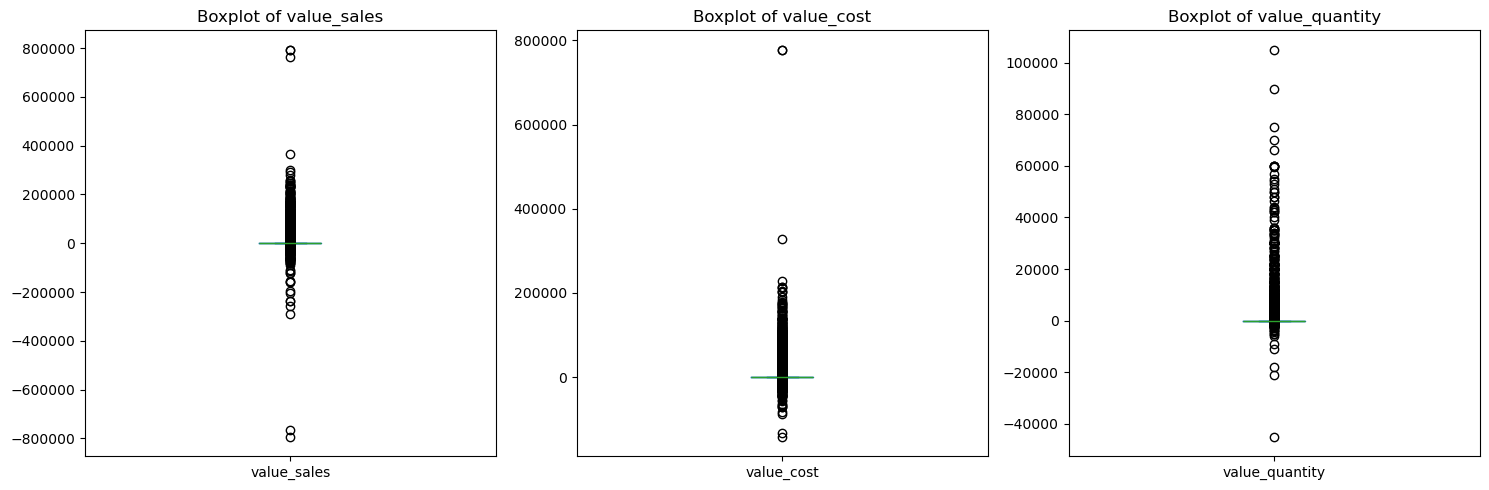

In [112]:
# Set up the figure with a grid of 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the box plot for 'value_sales' in the first subplot
merged_data['value_sales'].plot(kind='box', ax=axes[0])
axes[0].set_title('Boxplot of value_sales')

# Plot the box plot for 'value_cost' in the second subplot
merged_data['value_cost'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot of value_cost')

# Plot the box plot for 'value_quantity' in the third subplot
merged_data['value_quantity'].plot(kind='box', ax=axes[2])
axes[2].set_title('Boxplot of value_quantity')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- Histograms before cleaning outlier

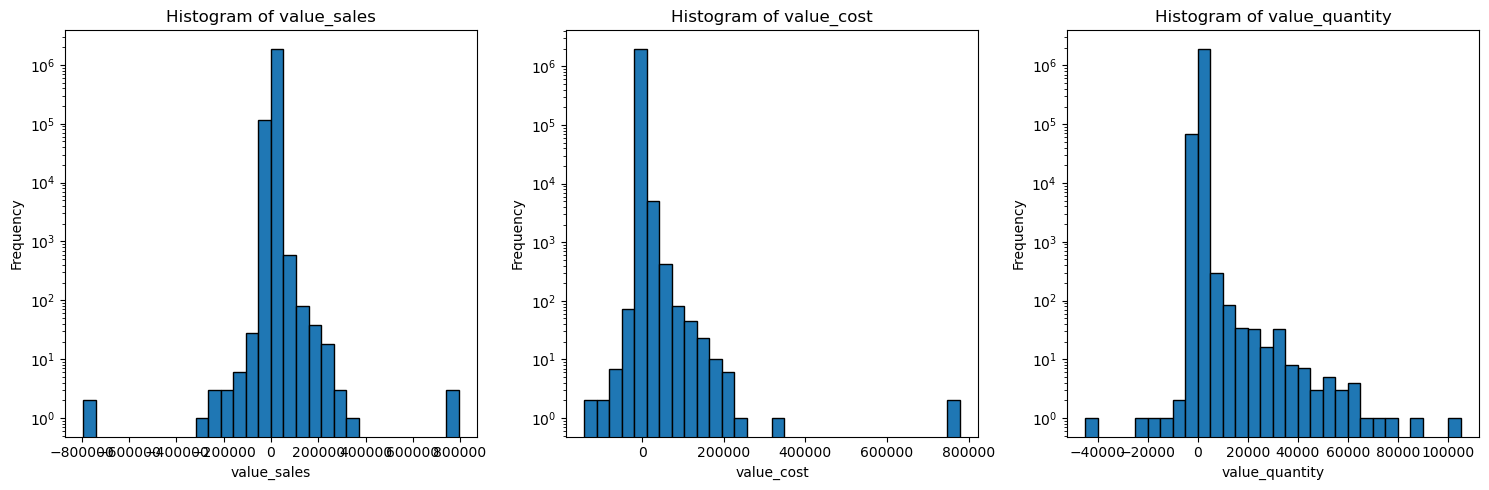

In [114]:
# Plot histograms for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for value_sales
axes[0].hist(merged_data['value_sales'], bins=30, edgecolor='black',log=True)
axes[0].set_title('Histogram of value_sales')
axes[0].set_xlabel('value_sales')
axes[0].set_ylabel('Frequency')

# Histogram for value_cost
axes[1].hist(merged_data['value_cost'], bins=30, edgecolor='black',log=True)
axes[1].set_title('Histogram of value_cost')
axes[1].set_xlabel('value_cost')
axes[1].set_ylabel('Frequency')

# Histogram for value_quantity
axes[2].hist(merged_data['value_quantity'], bins=30, edgecolor='black',log=True)
axes[2].set_title('Histogram of value_quantity')
axes[2].set_xlabel('value_quantity')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Highly Skewed Data:
The data for each of these columns is highly skewed, meaning there are many low or zero values and only a few high values.
This often occurs when there is a large number of small transactions (or even no transactions in some cases), and only a few large transactions.
2. Sparse Distribution:
The narrow and high central bars suggest that the vast majority of values are very close to zero, with few values spreading out across the range.
This could indicate that only a small percentage of transactions have high value_sales, value_cost, or value_quantity.
3. Potential Need for Transformation:
Because of the skewness, the data may benefit from a log transformation or another method to spread the values more evenly, especially if you plan to perform analyses or modeling that assume normality.
4. Zero or Minimal Transactions:
If there are many transactions with zero or minimal values in these columns, it might be useful to analyze these zero-value transactions separately. This could be a sign of canceled orders, unpaid invoices, or other business cases where no significant sales, cost, or quantity were recorded.

- Outlier management in core metric

In [117]:
# Define extreme boundaries based on your boxplot
extreme_sales_upper = 600000
extreme_sales_lower = -600000
extreme_cost_upper = 600000
extreme_cost_lower = -600000
extreme_quantity_upper = 80000
extreme_quantity_lower = -80000

# Filter rows that meet any of these extreme conditions
extreme_rows = merged_data[
    (merged_data['value_sales'] > extreme_sales_upper) | 
    (merged_data['value_sales'] < extreme_sales_lower) | 
    (merged_data['value_cost'] > extreme_cost_upper) | 
    (merged_data['value_cost'] < extreme_cost_lower) |
    (merged_data['value_quantity'] > extreme_quantity_upper) | 
    (merged_data['value_quantity'] < extreme_quantity_lower)
]

# Display the rows with extreme outliers
# Display only the selected columns with extreme outliers
extreme_columns = extreme_rows[['value_sales', 'value_cost', 'value_quantity','order_type_code','value_price_adjustment','customer_code','item_code']]

# Show the result
print("Extreme values in value_sales, value_cost, and value_quantity:")
print(extreme_columns)

Extreme values in value_sales, value_cost, and value_quantity:
         value_sales  value_cost  value_quantity order_type_code  \
51580   -765100.0000     -383.00            -5.0             CRR   
51768    765100.0000      383.00             5.0             NOR   
1683043  192388.9000   203595.15         89650.0             NOR   
1858931  793541.9800   777669.20            11.0             NOR   
1860865 -793541.9800        0.00             0.0             CRD   
1860866  793541.9800   777669.20            11.0             NOR   
1910302    1196.9964     1428.84        105000.0             EXP   

         value_price_adjustment customer_code     item_code  
51580                         0     602050300          GR99  
51768                         0     602050300          GR99  
1683043                       0     231920100        200767  
1858931                       0     400100300      NS010015  
1860865                       1     400100300      NS010015  
1860866             

In [118]:
filtered_data_gr99 = merged_data[merged_data['item_code'] == 'GR99'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']].sort_values(by=['value_sales'], ascending=True)
print(filtered_data_gr99)

         value_sales  value_cost  value_quantity order_type_code customer_code
51580     -765100.00     -383.00            -5.0             CRR     602050300
1823212     -3750.00    -1934.25           -25.0             CRR     646185705
53013       -1414.16     -612.80            -8.0             CRR     361000410
846528      -1060.62     -459.60            -6.0             CRR     361000414
15084        -784.60     -761.76           -10.0             NOR     234750001
...              ...         ...             ...             ...           ...
1220601      8643.24     8242.56           108.0             NOR     234750001
852050      12004.50    11448.00           150.0             NOR     234750001
1220733     13284.98    12669.12           166.0             NOR     234750001
1823950     24104.80    23865.84           290.0             NOR     234750001
51768      765100.00      383.00             5.0             NOR     602050300

[308 rows x 5 columns]


Drop extream outlier with item code GR99
1. Both rows have reversed, extreme values for value_sales and value_cost, indicating potential data entry errors.
2. These values are inconsistent with other entries for the same item_code (GR99) and the same customer, which follow a more typical pattern.
3. One entry is marked as a normal order (order_type_code = NOR), while the other appears to be a credit return (order_type_code = CRR). This mixed coding, coupled with reversed values, suggests that these entries are likely erroneous.

In [120]:
# Define the conditions for the rows to be dropped
drop_conditions = (
    (merged_data['item_code'] == 'GR99') &
    (merged_data['customer_code'] == 602050300) &
    ((merged_data['value_sales'] == -765100.0000) & (merged_data['value_cost'] == -383.00) & (merged_data['value_quantity'] == -5.0) & (merged_data['order_type_code'] == 'CRR') |
     (merged_data['value_sales'] == 765100.0000) & (merged_data['value_cost'] == 383.00) & (merged_data['value_quantity'] == 5.0) & (merged_data['order_type_code'] == 'NOR'))
)

# Drop the identified rows from the DataFrame
merged_data = merged_data[~drop_conditions]

In [121]:
filtered_data_200767 = merged_data[merged_data['item_code'] == '200767'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']].sort_values(by=['value_sales'], ascending=True)
print(filtered_data_200767)

         value_sales  value_cost  value_quantity order_type_code customer_code
595042      -2928.00        0.00             0.0             CRD     134860100
596849      -2065.00        0.00             0.0             CRD     471000816
1682855      -790.00        0.00             0.0             CRD     471200007
521263       -531.30     -531.42          -300.0             CRD     231920100
510829       -522.24     -339.32           -85.0             ZCG     Z45501801
...              ...         ...             ...             ...           ...
1683763     13330.00    13307.06          6200.0             NOR     231900101
1683002     15360.00    10730.00          5000.0             NOR     471000816
1683452     26825.00    26828.75         12500.0             NOR     231920100
1682374    102847.05   108837.68         47925.0             NOR     231920100
1683043    192388.90   203595.15         89650.0             NOR     231920100

[4288 rows x 5 columns]


In [122]:
# Define a threshold for high quantity
high_quantity_threshold = 50000

# Filter similar transactions with 'NOR' order_type_code and high quantities
similar_nor_transactions = merged_data[
    (merged_data['order_type_code'] == 'NOR') &
    (merged_data['value_quantity'] >= high_quantity_threshold)
][['value_sales', 'value_cost', 'value_quantity', 'order_type_code', 'customer_code']]

# Display the first few rows to observe any patterns
print(similar_nor_transactions.head(20))

         value_sales  value_cost  value_quantity order_type_code customer_code
1528007      32400.0    32400.00         54000.0             NOR     231920100
1683043     192388.9   203595.15         89650.0             NOR     231920100
1808060      11480.0    11466.00         70000.0             NOR     231920100
1820001      56180.0    56180.00         53000.0             NOR     231920100


For the extream outlier with item code 200767, keeping this outlier is reasonable, as it exhibits consistent characteristics with other high-quantity transactions, especially for the same customer. Dropping it would mean losing a valid record of a high-volume sale that aligns with expected business patterns.

In [124]:
filtered_data_NS010015 = merged_data[merged_data['item_code'] == 'NS010015'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']]
print(filtered_data_NS010015)

         value_sales  value_cost  value_quantity order_type_code customer_code
1858931    793541.98    777669.2            11.0             NOR     400100300
1860865   -793541.98         0.0             0.0             CRD     400100300
1860866    793541.98    777669.2            11.0             NOR     400100300


1. When looking at the three rows for this item code, there’s one row (ID 1860865) that has a negative value_sales (-793541.98) and a value_cost of 0. This pattern is unusual, as it represents a "credit" transaction with no cost and may indicate an adjustment or erroneous entry.
2. The other two rows (1858931 and 1860866) are identical in terms of value_sales, value_cost, and value_quantity. Retaining both would double-count the transaction, thus distorting the actual revenue, cost, and quantity figures for this item and customer.

In this section we decided to drop Rows 1860865 (the row with a negative sales value) and 1860866 (one of the duplicate entries).

In [126]:
# Drop row with negative sales for item NS010015
merged_data = merged_data.drop(merged_data[
    (merged_data['item_code'] == 'NS010015') &
    (merged_data['value_sales'] == -793541.98) &
    (merged_data['value_cost'] == 0.0)
].index)

# Drop duplicate row, keeping only one occurrence with the same sales, cost, and quantity values
merged_data = merged_data.drop(merged_data[
    (merged_data['item_code'] == 'NS010015') &
    (merged_data['value_sales'] == 793541.98) &
    (merged_data['value_cost'] == 777669.2) &
    (merged_data['value_quantity'] == 11.0)
].index[1])  # Drop only the second occurrence

In [127]:
filtered_data_TJ01 = merged_data[merged_data['item_code'] == 'TJ01-0002-00'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']]
print(filtered_data_TJ01)

         value_sales  value_cost  value_quantity order_type_code customer_code
1910300    -216.0000       0.000             0.0             CRD     800640100
1910301     205.2000       0.000             0.0             COP     800640100
1910302    1196.9964    1428.840        105000.0             EXP     800640100
1910303     216.0000     244.944         18000.0             EXP     800640100
1910304     143.9964     163.296         12000.0             EXP     800640100
1910305     855.0036    1020.600         75000.0             EXP     800640100


The outlier in row 1910302, this high-quantity transaction fits within the expected context of export orders and does not present data inconsistencies, it should be kept as a valid entry in your dataset. The reasoning is grounded in the typical behavior of export transactions and the item’s sales characteristics.

- Outlier management with zero and olaceholder values

In [130]:
# Count zero values in each column
zero_value_sales = (merged_data['value_sales'] == 0).sum()
zero_value_cost = (merged_data['value_cost'] == 0).sum()
zero_value_quantity = (merged_data['value_quantity'] == 0).sum()

# Display the counts
print("Number of zero values in value_sales:", zero_value_sales)
print("Number of zero values in value_cost:", zero_value_cost)
print("Number of zero values in value_quantity:", zero_value_quantity)

Number of zero values in value_sales: 22134
Number of zero values in value_cost: 49923
Number of zero values in value_quantity: 48549


- If all three columns (value_sales, value_cost, and value_quantity) have a value of zero, it likely means that the transaction didn't result in any sales, cost, or quantity. This might indicate a canceled transaction, a placeholder entry, or data that was recorded without any real financial or quantitative impact
- we decided to dropping rows with zero values in value_sales, value_cost, and value_quantity ensures data relevance, avoids distortion in aggregated metrics, maintains consistency in transaction records, and upholds data integrity. This approach helps your analysis reflect actual, meaningful transactions, leading to more accurate insights and decision-making.

In [132]:
# Step 1: Filter out rows where 'value_sales', 'value_cost', and 'value_quantity' are all zero
merged_data = merged_data[
    ~((merged_data['value_sales'] == 0) &
      (merged_data['value_cost'] == 0) &
      (merged_data['value_quantity'] == 0))
]

# Display the filtered data to confirm the rows are removed
print("Data after filtering out rows with all zero values in 'value_sales', 'value_cost', and 'value_quantity':")
print(merged_data)

Data after filtering out rows with all zero values in 'value_sales', 'value_cost', and 'value_quantity':
        accounting_date  fiscal_year  fiscal_month  calendar_year  \
0            2012-05-09         2012            11           2012   
1            2012-02-16         2012             8           2012   
2            2012-05-09         2012            11           2012   
3            2012-05-18         2012            11           2012   
4            2012-01-09         2012             7           2012   
...                 ...          ...           ...            ...   
1988377      2013-11-06         2014             5           2013   
1988378      2013-07-17         2014             1           2013   
1988379      2013-10-21         2014             4           2013   
1988380      2013-11-01         2014             5           2013   
1988381      2013-09-25         2014             3           2013   

         calendar_month  calendar_day  company_code customer_code 

In [133]:
# Check the result to ensure rows are removed
zero_values_data = merged_data[
    (merged_data['value_sales'] == 0) &
    (merged_data['value_cost'] == 0) &
    (merged_data['value_quantity'] == 0)
]

# Count the occurrences of each unique order_type_code
order_type_code_counts = zero_values_data.value_counts()

# Display the results
print("Order Type Codes where value_sales, value_cost, and value_quantity are all zero:")
print(order_type_code_counts)

Order Type Codes where value_sales, value_cost, and value_quantity are all zero:
Series([], Name: count, dtype: int64)


- Outlier management in data anomalies

In [135]:
# Filter rows where value_sales is less than value_cost
sales_less_than_cost = merged_data[merged_data['value_sales'] < merged_data['value_cost']]

# Display the number of rows that meet this condition
print("Number of rows where value_sales is less than value_cost:", sales_less_than_cost.shape[0])

Number of rows where value_sales is less than value_cost: 148475


In [136]:
# Get the unique order_type_code values for rows where value_sales < value_cost
order_class_code_counts = sales_less_than_cost['abc_class_code'].value_counts()

# Display the result
print("Order class Codes where value_sales is less than value_cost:")
print(order_class_code_counts)

Order class Codes where value_sales is less than value_cost:
abc_class_code
J    57656
D    26979
A    16063
U    13670
B     9250
C     8917
G     8366
E     3802
I     3168
F      604
Name: count, dtype: int64


The rationale for considering the removal of rows where value_sales < value_cost for abc_class_code categories C, G, I, and F is as follows:

- C (Low Sellers): This category consists of low-selling products. Selling these items at a loss may indicate inefficiency or business challenges, as these products typically shouldn't be sold below cost continuously.
- G (Component with no usage): This category includes components with no usage. Selling these below cost may not add real value to the business and suggests that they are being sold at a loss without generating a clear benefit.
- I (Indent Items - full lead time applies): Items that require full lead time to import, usually with higher associated costs due to import and storage. Selling these at a loss may be unwise, as they typically shouldn't be heavily discounted due to their import-related costs.
- F (New Items <6 months old): Newly introduced items less than six months old are expected to sell at a profitable price, as they are fresh in the market. Selling them below cost may indicate improper pricing or valuation issues.

In [138]:
# Define the categories to analyze
categories_to_check = ['C', 'G', 'I', 'F']

# Loop over each category and filter the data
for category in categories_to_check:
    # Filter rows where value_sales < value_cost and value_price_adjustment = 1 for each abc_class_code
    price_adjustment_data = merged_data[
        (merged_data['value_sales'] < merged_data['value_cost']) &
        (merged_data['value_price_adjustment'] == 1) &
        (merged_data['abc_class_code'] == category)
    ]

    # Filter rows where value_sales < value_cost and value_price_adjustment = 0 for each abc_class_code
    no_price_adjustment_data = merged_data[
        (merged_data['value_sales'] < merged_data['value_cost']) &
        (merged_data['value_price_adjustment'] == 0) &
        (merged_data['abc_class_code'] == category)
    ]

    # Display the counts
    print(f"Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code '{category}':", price_adjustment_data.shape[0])
    print(f"Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code '{category}':", no_price_adjustment_data.shape[0])
    print("\n")

Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code 'C': 3221
Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code 'C': 5696


Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code 'G': 5179
Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code 'G': 3187


Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code 'I': 731
Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code 'I': 2437


Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code 'F': 12
Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code 'F': 592




Dropping rows where value_sales < value_cost and value_price_adjustment = 0 for specific abc_class_codes like ['C', 'G', 'I', 'F']
- Removing rows with value_sales < value_cost and value_price_adjustment = 0 for specific product categories ensures that the dataset aligns with realistic business scenarios, enhances data quality, and prevents errors from impacting analysis and decision-making

In [140]:
# Define the categories to filter for dropping
categories_to_drop = ['C', 'G', 'I', 'F']

# Filter the rows to keep (i.e., those that don't meet the criteria for dropping)
filtered_data = merged_data[
    ~((merged_data['value_sales'] < merged_data['value_cost']) &
      (merged_data['value_price_adjustment'] == 0) &
      (merged_data['abc_class_code'].isin(categories_to_drop)))
]

# Assign the filtered data back to merged_data
merged_data = filtered_data

# Display the new shape of merged_data to confirm rows have been dropped
print("Data shape after dropping rows:", merged_data.shape)

Data shape after dropping rows: (1975249, 43)


In [141]:
# Get the unique order_type_code values for rows where value_sales < value_cost
order_type_code_counts = sales_less_than_cost['order_type_code'].value_counts()

# Display the result
print("Order Type Codes where value_sales is less than value_cost:")
print(order_type_code_counts)

Order Type Codes where value_sales is less than value_cost:
order_type_code
CRD    47206
CRR    45019
NOR    30759
CDG    11781
NOH     3339
SPC     2740
ZCG     1883
ZCR     1402
PMO     1025
EXP      530
CPR      519
PRD      417
PRO      345
CRP      294
AES      238
PUP      232
CSH      218
5TN      215
PPO      121
NOS       78
EDI       73
MIN       13
COA       12
PSA       11
WDC        2
ZC2        1
ZD3        1
OBS        1
PPD        0
SPL        0
PM0        0
PGS        0
EDS        0
CSO        0
COP        0
ZOP        0
Name: count, dtype: int64


In [142]:
# Filtering for rows where quantity is negative for normal orders (NOR, NOH, NOS)
negative_quantity_normal_orders = merged_data[
    (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
    (merged_data['value_quantity'] < 0)
]

# Count the rows that meet this condition
negative_quantity_count = negative_quantity_normal_orders.shape[0]
negative_quantity_count

3584

For normal orders (NOR, NOH, NOS), in a typical business context, these orders should not have returns or negative quantities. These are straightforward purchases where the customer orders goods, and the transaction reflects normal sales figures. Generally, if there is a negative quantity in these types of orders

In [144]:
# Remove rows where quantity is negative in normal orders (NOR, NOH, NOS)
merged_data = merged_data[
    ~((merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
      (merged_data['value_quantity'] < 0))
]

# Filtering for rows where quantity is negative for normal orders (NOR, NOH, NOS)
negative_quantity_normal_orders = merged_data[
    (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
    (merged_data['value_quantity'] < 0)
]

# Count the rows that meet this condition
negative_quantity_count = negative_quantity_normal_orders.shape[0]
negative_quantity_count

0

- Outlier management with day gap

In [146]:
# Calculate the day gap
merged_data['day_gap'] = (merged_data['accounting_date'] - merged_data['order_date']).dt.days

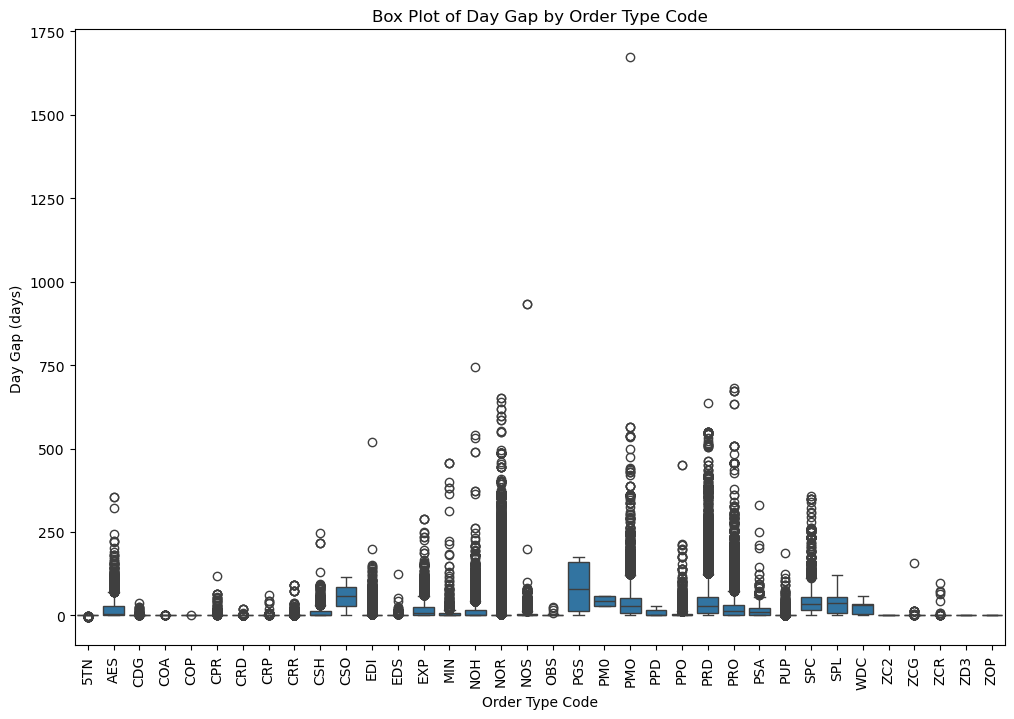

In [147]:
# Plotting a box plot for day gap by each order type code
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='order_type_code', y='day_gap')
plt.xticks(rotation=90)
plt.title("Box Plot of Day Gap by Order Type Code")
plt.xlabel("Order Type Code")
plt.ylabel("Day Gap (days)")
plt.show()

In [148]:
max_day_gap = merged_data['day_gap'].max()
min_day_gap = merged_data['day_gap'].min()
median_day_gap = merged_data['day_gap'].median()
average_day_gap = merged_data['day_gap'].mean()
print(f"Max day gap: {max_day_gap} days")
print(f"Min day gap: {min_day_gap} days")
print(f"Median day gap: {median_day_gap} days")
print(f"The average day gap between order date and accounting date is: {average_day_gap:.2f} days")

Max day gap: 1672 days
Min day gap: -6 days
Median day gap: 0.0 days
The average day gap between order date and accounting date is: 3.69 days


For max day gap 1672 days it is unrealistic Processing Time: A day gap of 1,672 days (almost 4.5 years) is highly unusual for typical order processing. This value far exceeds the reasonable timeframe for any order-to-accounting process, suggesting an error or anomaly in data entry. So we decided to drop that column.

In [150]:
merged_data = merged_data[merged_data['day_gap'] != 1672]

- Check day gap with negative value

In [152]:
# Filter rows where day_gap is less than 0
negative_day_gap = merged_data[merged_data['day_gap'] < 0]

# Display the result
print(negative_day_gap[['order_date', 'accounting_date', 'day_gap','order_type_code']])

       order_date accounting_date  day_gap order_type_code
526191 2012-01-10      2012-01-09       -1             5TN
526192 2012-01-10      2012-01-09       -1             5TN
526193 2012-01-10      2012-01-09       -1             5TN
526194 2012-01-10      2012-01-09       -1             5TN
526195 2012-01-10      2012-01-09       -1             5TN
526196 2012-01-10      2012-01-09       -1             5TN
527063 2012-01-09      2012-01-03       -6             5TN
527064 2012-01-09      2012-01-03       -6             5TN
527065 2012-01-09      2012-01-03       -6             5TN
527066 2012-01-09      2012-01-03       -6             5TN
527651 2012-01-09      2012-01-03       -6             5TN
527652 2012-01-09      2012-01-03       -6             5TN
527653 2012-01-09      2012-01-03       -6             5TN
527654 2012-01-09      2012-01-03       -6             5TN
527655 2012-01-09      2012-01-03       -6             5TN
527656 2012-01-09      2012-01-03       -6             5

Typically, it would be unusual for the order_date to be later than the accounting_date (resulting in a negative day_gap). This might indicate that data entry errors dates may have been recorded incorrectly, either for order_date or accounting_date. So we decided to drop it.

In [154]:
# Drop rows where day_gap is less than 0
merged_data = merged_data[merged_data['day_gap'] >= 0]

Define Grouping for order_type_code

- Normal Order: NOR, NOS, NOH
- Project Order: PRO, PRD, PMO, PM0
- Credit Adjustment: CRD, CRP, CRR, COP, COA
- Specialty Orders: AES, SPC, PUP
- Export Order: EXP
- Do Not Use: EDS, OBS, PPD, WDC, PGS, SPL, ZOP, ZC2, 5TN, PPO, ZD3, CSO
- Other: Any remaining types (such as EDI or specific exceptions like ZCG, ZCR)

In [156]:
# Define a mapping dictionary for order_type_code to group
group_mapping = {
    'NOR': 'Normal Order', 'NOS': 'Normal Order', 'NOH': 'Normal Order',
    'PRO': 'Project Order', 'PRD': 'Project Order', 'PMO': 'Project Order', 'PM0': 'Project Order',
    'CRD': 'Credit Adjustment', 'CRP': 'Credit Adjustment', 'CRR': 'Credit Adjustment', 
    'COP': 'Credit Adjustment', 'COA': 'Credit Adjustment',
    'AES': 'Specialty Orders', 'SPC': 'Specialty Orders', 'PUP': 'Specialty Orders',
    'EXP': 'Export Order',
    'EDS': 'Do Not Use', 'OBS': 'Do Not Use', 'PPD': 'Do Not Use', 'WDC': 'Do Not Use', 
    'PGS': 'Do Not Use', 'SPL': 'Do Not Use', 'ZOP': 'Do Not Use', 'ZC2': 'Do Not Use', 
    '5TN': 'Do Not Use', 'PPO': 'Do Not Use', 'ZD3': 'Do Not Use', 'CSO': 'Do Not Use',
    # Default group for any other type codes not explicitly mentioned
    'EDI': 'Other', 'ZCG': 'Other', 'ZCR': 'Other'
}

# Map the group to a new column in the DataFrame
merged_data['order_group'] = merged_data['order_type_code'].map(group_mapping)

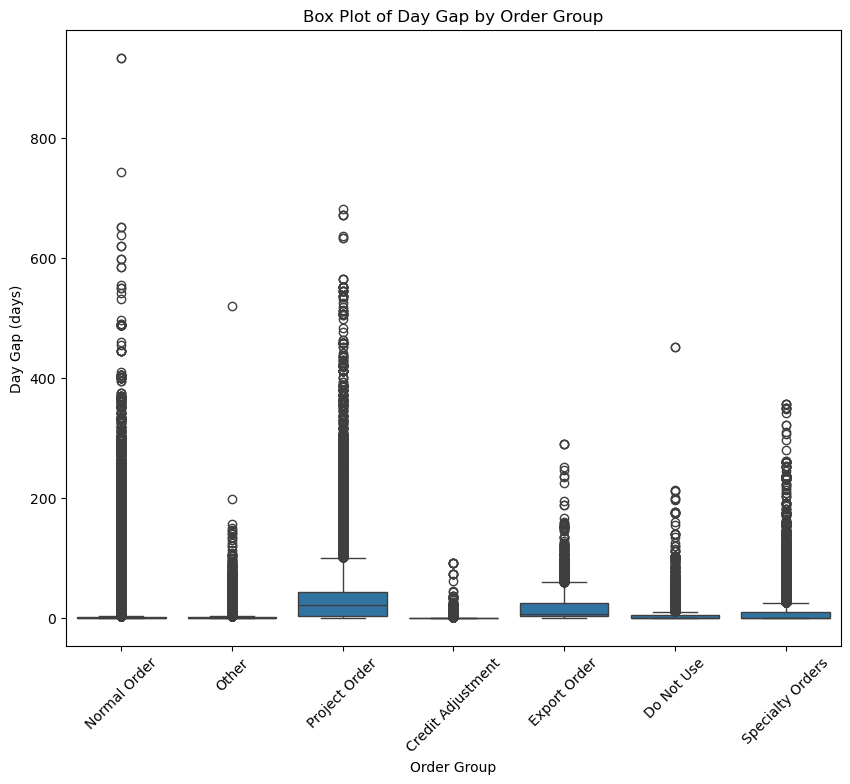

In [157]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create a box plot for day_gap by order_group
sns.boxplot(data=merged_data, x='order_group', y='day_gap')
plt.xticks(rotation=45)
plt.title("Box Plot of Day Gap by Order Group")
plt.xlabel("Order Group")
plt.ylabel("Day Gap (days)")
plt.show()

In [158]:
# Define the high day_gap threshold for Normal Orders
normal_order_threshold = 365  # Set this threshold based on expected processing time for normal orders

# Filter for Normal Orders (NOR, NOH, NOS) with day_gap above the threshold
high_day_gap_normal_orders = merged_data[
    (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) &
    (merged_data['day_gap'] > normal_order_threshold)
]

# Display the filtered high day_gap records for Normal Orders
print("High day_gap entries in Normal Orders:")
print(high_day_gap_normal_orders[['order_type_code', 'order_date', 'accounting_date', 'day_gap']])

High day_gap entries in Normal Orders:
        order_type_code order_date accounting_date  day_gap
342113              NOR 2010-11-15      2012-02-02      444
345386              NOR 2010-11-15      2012-02-02      444
345478              NOR 2010-11-15      2012-02-02      444
359045              NOR 2010-11-15      2012-02-02      444
375231              NOR 2010-11-15      2012-02-02      444
...                 ...        ...             ...      ...
1971202             NOR 2012-05-18      2013-09-18      488
1971495             NOR 2012-09-17      2013-09-18      366
1973585             NOR 2012-09-17      2013-09-18      366
1978731             NOR 2012-05-18      2013-09-18      488
1979980             NOR 2012-05-18      2013-09-18      488

[130 rows x 4 columns]


- Choosing a threshold of 365 days (one year) for day_gap in Normal Orders could be a reasonable approach.
- Business Logic: In most businesses, it’s unusual for a normal order to take more than a year to be recorded in the accounting system, especially for straightforward, routine orders. Therefore, any day_gap exceeding 365 days likely indicates an anomaly or data inconsistency.

In [160]:
# Dropping rows with high day_gap for Normal Orders (NOR, NOH, NOS) above the threshold of 365 days
merged_data = merged_data[~(
    (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) &
    (merged_data['day_gap'] > 365)
)]

- Check outlier after managing high day gap

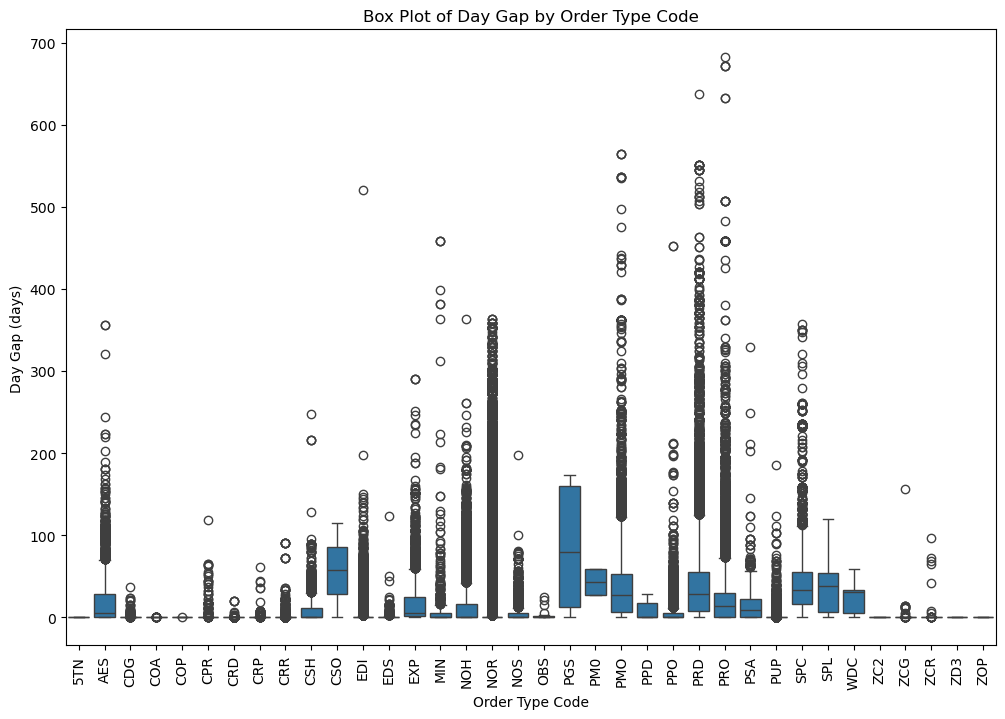

In [162]:
# Plotting a box plot for day gap by each order type code
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='order_type_code', y='day_gap')
plt.xticks(rotation=90)
plt.title("Box Plot of Day Gap by Order Type Code")
plt.xlabel("Order Type Code")
plt.ylabel("Day Gap (days)")
plt.show()

<!-- 3. Managing the 0 values -->

In [164]:
# # Count zero values in each column
# zero_value_sales = (merged_data['value_sales'] == 0).sum()
# zero_value_cost = (merged_data['value_cost'] == 0).sum()
# zero_value_quantity = (merged_data['value_quantity'] == 0).sum()

# # Display the counts
# print("Number of zero values in value_sales:", zero_value_sales)
# print("Number of zero values in value_cost:", zero_value_cost)
# print("Number of zero values in value_quantity:", zero_value_quantity)


<!-- - If all three columns (value_sales, value_cost, and value_quantity) have a value of zero, it likely means that the transaction didn't result in any sales, cost, or quantity. This might indicate a canceled transaction, a placeholder entry, or data that was recorded without any real financial or quantitative impact
- we decided to dropping rows with zero values in value_sales, value_cost, and value_quantity ensures data relevance, avoids distortion in aggregated metrics, maintains consistency in transaction records, and upholds data integrity. This approach helps your analysis reflect actual, meaningful transactions, leading to more accurate insights and decision-making. -->

In [166]:
# # Step 1: Filter out rows where 'value_sales', 'value_cost', and 'value_quantity' are all zero
# merged_data = merged_data[
#     ~((merged_data['value_sales'] == 0) &
#       (merged_data['value_cost'] == 0) &
#       (merged_data['value_quantity'] == 0))
# ]

# # Display the filtered data to confirm the rows are removed
# print("Data after filtering out rows with all zero values in 'value_sales', 'value_cost', and 'value_quantity':")
# print(merged_data)


In [167]:
# # Check the result to ensure rows are removed
# zero_values_data = merged_data[
#     (merged_data['value_sales'] == 0) &
#     (merged_data['value_cost'] == 0) &
#     (merged_data['value_quantity'] == 0)
# ]

# # Count the occurrences of each unique order_type_code
# order_type_code_counts = zero_values_data['order_type_code'].value_counts()

# # Display the results
# print("Order Type Codes where value_sales, value_cost, and value_quantity are all zero:")
# print(order_type_code_counts)

In [168]:
# # Filter rows where value_sales is less than value_cost
# sales_less_than_cost = merged_data[merged_data['value_sales'] < merged_data['value_cost']]

# # Display the number of rows that meet this condition
# print("Number of rows where value_sales is less than value_cost:", sales_less_than_cost.shape[0])

In [169]:
# # Get the unique order_type_code values for rows where value_sales < value_cost
# order_class_code_counts = sales_less_than_cost['abc_class_code'].value_counts()

# # Display the result
# print("Order class Codes where value_sales is less than value_cost:")
# print(order_class_code_counts)

<!-- The rationale for considering the removal of rows where value_sales < value_cost for abc_class_code categories C, G, I, and F is as follows:

- C (Low Sellers): This category consists of low-selling products. Selling these items at a loss may indicate inefficiency or business challenges, as these products typically shouldn't be sold below cost continuously.
- G (Component with no usage): This category includes components with no usage. Selling these below cost may not add real value to the business and suggests that they are being sold at a loss without generating a clear benefit.
- I (Indent Items - full lead time applies): Items that require full lead time to import, usually with higher associated costs due to import and storage. Selling these at a loss may be unwise, as they typically shouldn't be heavily discounted due to their import-related costs.
- F (New Items <6 months old): Newly introduced items less than six months old are expected to sell at a profitable price, as they are fresh in the market. Selling them below cost may indicate improper pricing or valuation issues. -->

In [171]:
# # Define the categories to analyze
# categories_to_check = ['C', 'G', 'I', 'F']

# # Loop over each category and filter the data
# for category in categories_to_check:
#     # Filter rows where value_sales < value_cost and value_price_adjustment = 1 for each abc_class_code
#     price_adjustment_data = merged_data[
#         (merged_data['value_sales'] < merged_data['value_cost']) &
#         (merged_data['value_price_adjustment'] == 1) &
#         (merged_data['abc_class_code'] == category)
#     ]

#     # Filter rows where value_sales < value_cost and value_price_adjustment = 0 for each abc_class_code
#     no_price_adjustment_data = merged_data[
#         (merged_data['value_sales'] < merged_data['value_cost']) &
#         (merged_data['value_price_adjustment'] == 0) &
#         (merged_data['abc_class_code'] == category)
#     ]

#     # Display the counts
#     print(f"Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code '{category}':", price_adjustment_data.shape[0])
#     print(f"Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code '{category}':", no_price_adjustment_data.shape[0])
#     print("\n")


<!-- Dropping rows where value_sales < value_cost and value_price_adjustment = 0 for specific abc_class_codes like ['C', 'G', 'I', 'F']
- Removing rows with value_sales < value_cost and value_price_adjustment = 0 for specific product categories ensures that the dataset aligns with realistic business scenarios, enhances data quality, and prevents errors from impacting analysis and decision-making -->

In [173]:
# # Define the categories to filter for dropping
# categories_to_drop = ['C', 'G', 'I', 'F']

# # Filter the rows to keep (i.e., those that don't meet the criteria for dropping)
# filtered_data = merged_data[
#     ~((merged_data['value_sales'] < merged_data['value_cost']) &
#       (merged_data['value_price_adjustment'] == 0) &
#       (merged_data['abc_class_code'].isin(categories_to_drop)))
# ]

# # Assign the filtered data back to merged_data
# merged_data = filtered_data

# # Display the new shape of merged_data to confirm rows have been dropped
# print("Data shape after dropping rows:", merged_data.shape)

In [174]:
# # Get the unique order_type_code values for rows where value_sales < value_cost
# order_type_code_counts = sales_less_than_cost['order_type_code'].value_counts()

# # Display the result
# print("Order Type Codes where value_sales is less than value_cost:")
# print(order_type_code_counts)

In [175]:
# # Filtering for rows where quantity is negative for normal orders (NOR, NOH, NOS)
# negative_quantity_normal_orders = merged_data[
#     (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
#     (merged_data['value_quantity'] < 0)
# ]

# # Count the rows that meet this condition
# negative_quantity_count = negative_quantity_normal_orders.shape[0]
# negative_quantity_count

<!-- For normal orders (NOR, NOH, NOS), in a typical business context, these orders should not have returns or negative quantities. These are straightforward purchases where the customer orders goods, and the transaction reflects normal sales figures. Generally, if there is a negative quantity in these types of orders -->

In [177]:
# # Remove rows where quantity is negative in normal orders (NOR, NOH, NOS)
# merged_data = merged_data[
#     ~((merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
#       (merged_data['value_quantity'] < 0))
# ]

# # Filtering for rows where quantity is negative for normal orders (NOR, NOH, NOS)
# negative_quantity_normal_orders = merged_data[
#     (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
#     (merged_data['value_quantity'] < 0)
# ]

# # Count the rows that meet this condition
# negative_quantity_count = negative_quantity_normal_orders.shape[0]
# negative_quantity_count

In [178]:
# # Define extreme boundaries based on your boxplot
# extreme_sales_upper = 600000
# extreme_sales_lower = -600000
# extreme_cost_upper = 600000
# extreme_cost_lower = -600000
# extreme_quantity_upper = 80000
# extreme_quantity_lower = -80000

# # Filter rows that meet any of these extreme conditions
# extreme_rows = merged_data[
#     (merged_data['value_sales'] > extreme_sales_upper) | 
#     (merged_data['value_sales'] < extreme_sales_lower) | 
#     (merged_data['value_cost'] > extreme_cost_upper) | 
#     (merged_data['value_cost'] < extreme_cost_lower) |
#     (merged_data['value_quantity'] > extreme_quantity_upper) | 
#     (merged_data['value_quantity'] < extreme_quantity_lower)
# ]

# # Display the rows with extreme outliers
# # Display only the selected columns with extreme outliers
# extreme_columns = extreme_rows[['value_sales', 'value_cost', 'value_quantity','order_type_code','value_price_adjustment','customer_code','item_code']]

# # Show the result
# print("Extreme values in value_sales, value_cost, and value_quantity:")
# print(extreme_columns)


In [179]:
# filtered_data_gr99 = merged_data[merged_data['item_code'] == 'GR99'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']].sort_values(by=['value_sales'], ascending=True)
# print(filtered_data_gr99)

<!-- Drop extream outlier with item code GR99
1. Both rows have reversed, extreme values for value_sales and value_cost, indicating potential data entry errors.
2. These values are inconsistent with other entries for the same item_code (GR99) and the same customer, which follow a more typical pattern.
3. One entry is marked as a normal order (order_type_code = NOR), while the other appears to be a credit return (order_type_code = CRR). This mixed coding, coupled with reversed values, suggests that these entries are likely erroneous. -->

In [181]:
# # Define the conditions for the rows to be dropped
# drop_conditions = (
#     (merged_data['item_code'] == 'GR99') &
#     (merged_data['customer_code'] == 602050300) &
#     ((merged_data['value_sales'] == -765100.0000) & (merged_data['value_cost'] == -383.00) & (merged_data['value_quantity'] == -5.0) & (merged_data['order_type_code'] == 'CRR') |
#      (merged_data['value_sales'] == 765100.0000) & (merged_data['value_cost'] == 383.00) & (merged_data['value_quantity'] == 5.0) & (merged_data['order_type_code'] == 'NOR'))
# )

# # Drop the identified rows from the DataFrame
# merged_data = merged_data[~drop_conditions]

In [182]:
# filtered_data_200767 = merged_data[merged_data['item_code'] == '200767'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']].sort_values(by=['value_sales'], ascending=True)
# print(filtered_data_200767)

In [183]:
# # Define a threshold for high quantity
# high_quantity_threshold = 50000

# # Filter similar transactions with 'NOR' order_type_code and high quantities
# similar_nor_transactions = merged_data[
#     (merged_data['order_type_code'] == 'NOR') &
#     (merged_data['value_quantity'] >= high_quantity_threshold)
# ][['value_sales', 'value_cost', 'value_quantity', 'order_type_code', 'customer_code']]

# # Display the first few rows to observe any patterns
# print(similar_nor_transactions.head(20))

<!-- For the extream outlier with item code 200767, keeping this outlier is reasonable, as it exhibits consistent characteristics with other high-quantity transactions, especially for the same customer. Dropping it would mean losing a valid record of a high-volume sale that aligns with expected business patterns. -->

In [185]:
# filtered_data_NS010015 = merged_data[merged_data['item_code'] == 'NS010015'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']]
# print(filtered_data_NS010015)

<!-- 1. When looking at the three rows for this item code, there’s one row (ID 1860865) that has a negative value_sales (-793541.98) and a value_cost of 0. This pattern is unusual, as it represents a "credit" transaction with no cost and may indicate an adjustment or erroneous entry.
2. The other two rows (1858931 and 1860866) are identical in terms of value_sales, value_cost, and value_quantity. Retaining both would double-count the transaction, thus distorting the actual revenue, cost, and quantity figures for this item and customer.

In this section we decided to drop Rows 1860865 (the row with a negative sales value) and 1860866 (one of the duplicate entries). -->

In [187]:
# # Drop row with negative sales for item NS010015
# merged_data = merged_data.drop(merged_data[
#     (merged_data['item_code'] == 'NS010015') &
#     (merged_data['value_sales'] == -793541.98) &
#     (merged_data['value_cost'] == 0.0)
# ].index)

# # Drop duplicate row, keeping only one occurrence with the same sales, cost, and quantity values
# merged_data = merged_data.drop(merged_data[
#     (merged_data['item_code'] == 'NS010015') &
#     (merged_data['value_sales'] == 793541.98) &
#     (merged_data['value_cost'] == 777669.2) &
#     (merged_data['value_quantity'] == 11.0)
# ].index[1])  # Drop only the second occurrence

In [188]:
# filtered_data_TJ01 = merged_data[merged_data['item_code'] == 'TJ01-0002-00'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']]
# print(filtered_data_TJ01)

<!-- The outlier in row 1910302, this high-quantity transaction fits within the expected context of export orders and does not present data inconsistencies, it should be kept as a valid entry in your dataset. The reasoning is grounded in the typical behavior of export transactions and the item’s sales characteristics. -->

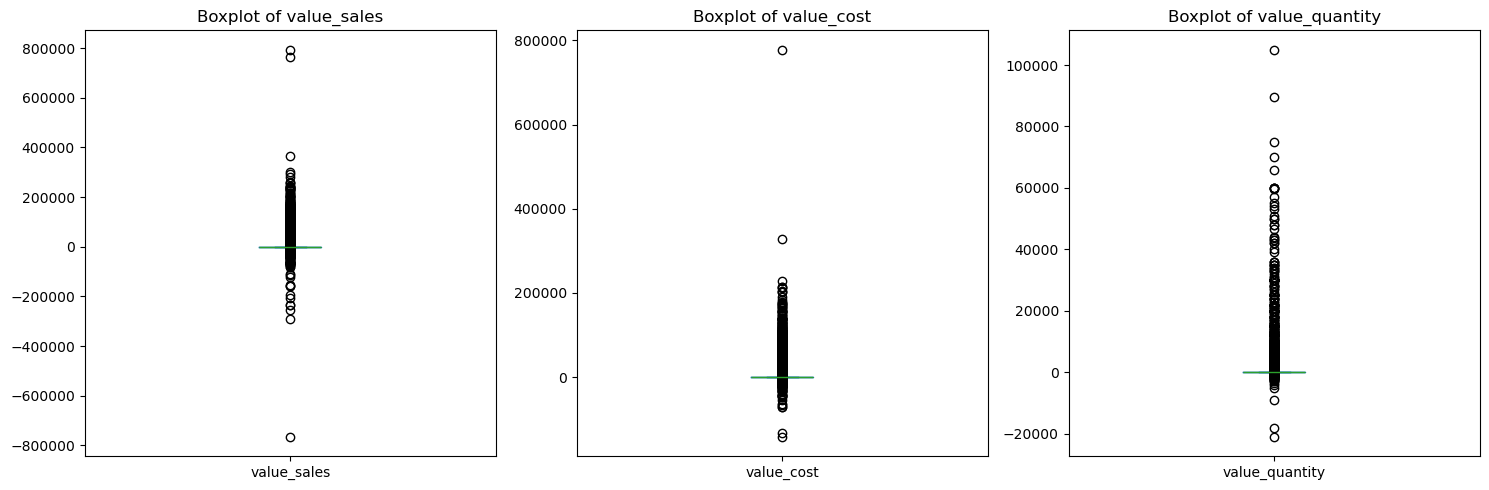

In [190]:
# Set up the figure with a grid of 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the box plot for 'value_sales' in the first subplot
merged_data['value_sales'].plot(kind='box', ax=axes[0])
axes[0].set_title('Boxplot of value_sales')

# Plot the box plot for 'value_cost' in the second subplot
merged_data['value_cost'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot of value_cost')

# Plot the box plot for 'value_quantity' in the third subplot
merged_data['value_quantity'].plot(kind='box', ax=axes[2])
axes[2].set_title('Boxplot of value_quantity')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

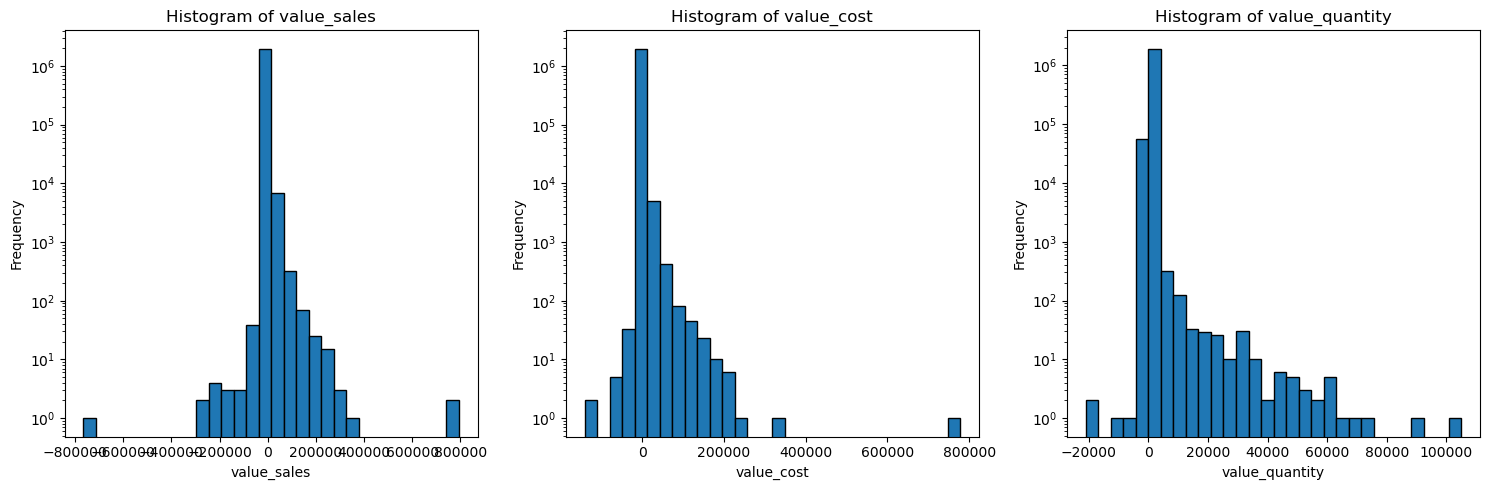

In [191]:
# Plot histograms for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for value_sales
axes[0].hist(merged_data['value_sales'], bins=30, edgecolor='black',log=True)
axes[0].set_title('Histogram of value_sales')
axes[0].set_xlabel('value_sales')
axes[0].set_ylabel('Frequency')

# Histogram for value_cost
axes[1].hist(merged_data['value_cost'], bins=30, edgecolor='black',log=True)
axes[1].set_title('Histogram of value_cost')
axes[1].set_xlabel('value_cost')
axes[1].set_ylabel('Frequency')

# Histogram for value_quantity
axes[2].hist(merged_data['value_quantity'], bins=30, edgecolor='black',log=True)
axes[2].set_title('Histogram of value_quantity')
axes[2].set_xlabel('value_quantity')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- Check shape after mananging outlier

In [193]:
merged_data.shape

(1971502, 45)

- Check skewness after mananging outlier

In [196]:
# Calculate skewness for each numerical column in the DataFrame
skewness = merged_data[['value_sales', 'value_cost', 'value_quantity']].skew()

# Display the skewness values
print("Skewness of each numerical column:")
print(skewness)

Skewness of each numerical column:
value_sales        34.417877
value_cost         63.282836
value_quantity    117.404880
dtype: float64


## 6. Normalization and Scaling 
Log Transformation
1. Reduce Skewness: Log transformations are particularly useful for data that has a long tail or is highly skewed. They compress the range, making the data more "normal" or symmetric, which can improve the performance of statistical analyses and machine learning models.
2. Handle Wide Ranges: If your data has a large range of values (e.g., from very small to very large numbers), a log transformation can help compress this range, allowing models to process the data more effectively.

Columns Not Typically Scaled

1. Date-related Columns (accounting_date, fiscal_year, fiscal_month, calendar_year, calendar_month, calendar_day, invoice_date, order_date):
Date and time columns generally don't need normalization or standardization as they are either categorical (year, month, day) or timestamp-based. However, you may consider extracting specific features (e.g., day of the week, month, quarter) if these attributes are relevant to your analysis.
2. Categorical Columns (customer_code, item_code, business_area_code, etc.):
Categorical columns should be encoded rather than scaled. You could use One-Hot Encoding for non-ordinal categorical columns (e.g., item_class_code, order_type_code) or Label Encoding if they have an ordinal nature. For example, abc_class_code could potentially be ordinal, depending on its meaning.
3. Integer Columns (e.g., company_code, customer_district_code, item_type):
While some integer columns represent IDs or categorical codes (such as company_code, customer_code), they don’t need scaling. However, for any numerical columns that actually represent measurements or counts (like value_quantity), scaling could be useful.

In [200]:
merged_data.shape

(1971502, 45)

1. Condition 1 (data > 0) is ideal when only need to transform strictly positive data and can exclude zero or negative values.
2. Condition 2 (data >= 0) allows to retain zero values in the transformation, which is helpful if the zeros are meaningful in this analysis and do not lose data rows with zero values.

In [203]:
# Condition 1: Count rows with data > 0 for standard log transformation
value_sales_log_count = merged_data[merged_data['value_sales'] > 0].shape[0]
value_cost_log_count = merged_data[merged_data['value_cost'] > 0].shape[0]
value_quantity_log_count = merged_data[merged_data['value_quantity'] > 0].shape[0]

# Condition 2: Count rows with data >= 0 for log(1 + x) transformation
value_sales_log_plus1_count = merged_data[merged_data['value_sales'] >= 0].shape[0]
value_cost_log_plus1_count = merged_data[merged_data['value_cost'] >= 0].shape[0]
value_quantity_log_plus1_count = merged_data[merged_data['value_quantity'] >= 0].shape[0]

# Display the results
print("Row counts for standard log transformation (data > 0):")
print(f"value_sales_log: {value_sales_log_count}")
print(f"value_cost_log: {value_cost_log_count}")
print(f"value_quantity_log: {value_quantity_log_count}")

print("\nRow counts for log(1 + x) transformation (data >= 0):")
print(f"value_sales_log_plus1: {value_sales_log_plus1_count}")
print(f"value_cost_log_plus1: {value_cost_log_plus1_count}")
print(f"value_quantity_log_plus1: {value_quantity_log_plus1_count}")

Row counts for standard log transformation (data > 0):
value_sales_log: 1849972
value_cost_log: 1865685
value_quantity_log: 1867001

Row counts for log(1 + x) transformation (data >= 0):
value_sales_log_plus1: 1868754
value_cost_log_plus1: 1915340
value_quantity_log_plus1: 1915315


- Log Transformation with Data Adjustment (log(1 + x))
- To address skewness and improve data distribution, I applied log transformations to certain features. Traditional log transformation (log(x)) can only be used with positive values (x > 0), requiring exclusion or separate handling of zeros, which risks data loss. By using log(1 + x), zero values are transformed to log(1) = 0, preserving all data points, including zeros. This approach is particularly beneficial when zero values indicate meaningful information, allowing for a complete and interpretable dataset.

Log Transformation with Data Adjustment (log(1 + x))

In [207]:
# Apply log(1 + x) transformation for non-negative values and retain original negative values
merged_data['value_sales_log_plus1_transformed'] = np.where(
    merged_data['value_sales'] >= 0,
    np.log1p(merged_data['value_sales']),
    merged_data['value_sales']  # Retain original value for negative numbers
)

merged_data['value_cost_log_plus1_transformed'] = np.where(
    merged_data['value_cost'] >= 0,
    np.log1p(merged_data['value_cost']),
    merged_data['value_cost']  # Retain original value for negative numbers
)

merged_data['value_quantity_log_plus1_transformed'] = np.where(
    merged_data['value_quantity'] >= 0,
    np.log1p(merged_data['value_quantity']),
    merged_data['value_quantity']  # Retain original value for negative numbers
)

# Display the first few rows to confirm
print("Data with log(1 + x) transformation applied to non-negative values and negative values retained:")
print(merged_data[['value_sales', 'value_sales_log_plus1_transformed',
                   'value_cost', 'value_cost_log_plus1_transformed',
                   'value_quantity', 'value_quantity_log_plus1_transformed']].head())

# Check for missing values to confirm
print("\nMissing values check:")
print("value_sales_log_plus1_transformed:", merged_data['value_sales_log_plus1_transformed'].isnull().sum())
print("value_cost_log_plus1_transformed:", merged_data['value_cost_log_plus1_transformed'].isnull().sum())
print("value_quantity_log_plus1_transformed:", merged_data['value_quantity_log_plus1_transformed'].isnull().sum())

Data with log(1 + x) transformation applied to non-negative values and negative values retained:
   value_sales  value_sales_log_plus1_transformed  value_cost  \
0       218.40                           5.390897    178.1976   
1        38.28                           3.670715     25.4568   
2        40.20                           3.718438     25.4568   
3        20.10                           3.049273     12.7284   
4        19.14                           3.002708     12.7284   

   value_cost_log_plus1_transformed  value_quantity  \
0                          5.188489            84.0   
1                          3.275513            12.0   
2                          3.275513            12.0   
3                          2.619467             6.0   
4                          2.619467             6.0   

   value_quantity_log_plus1_transformed  
0                              4.442651  
1                              2.564949  
2                              2.564949  
3            

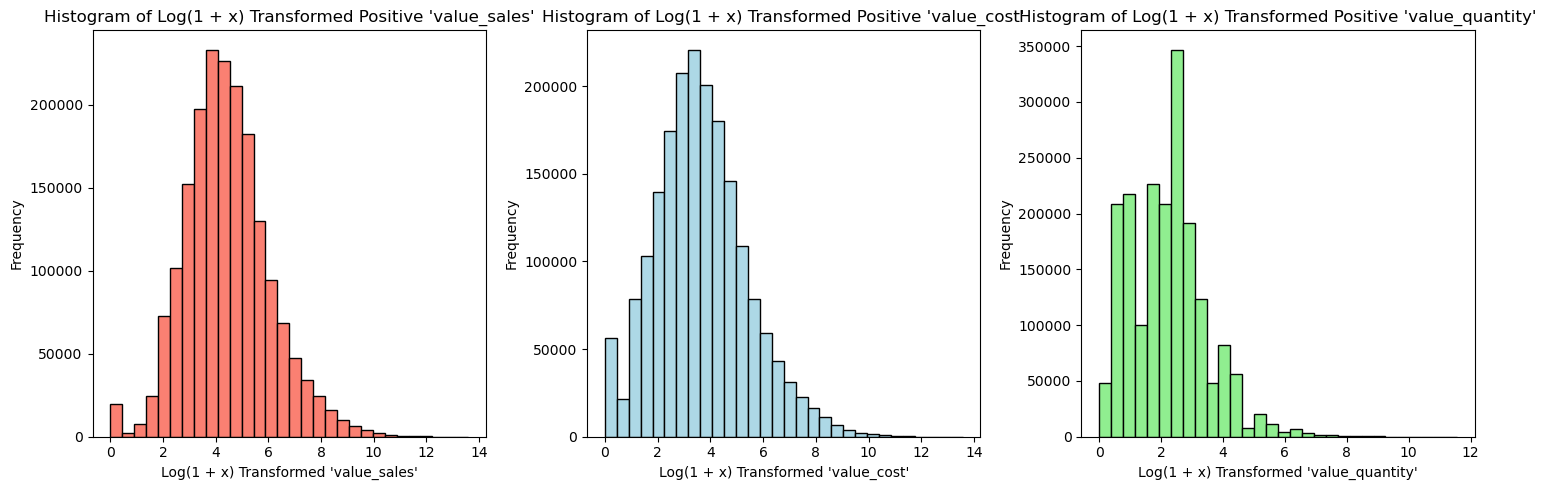

In [209]:
import matplotlib.pyplot as plt

# Filter out negative values for each transformed column
positive_sales_log_plus1 = merged_data[merged_data['value_sales_log_plus1_transformed'] >= 0]['value_sales_log_plus1_transformed']
positive_cost_log_plus1 = merged_data[merged_data['value_cost_log_plus1_transformed'] >= 0]['value_cost_log_plus1_transformed']
positive_quantity_log_plus1 = merged_data[merged_data['value_quantity_log_plus1_transformed'] >= 0]['value_quantity_log_plus1_transformed']

# Plot histograms for only positive values in each transformed column
plt.figure(figsize=(15, 5))

# Histogram for value_sales_log_plus1_transformed
plt.subplot(1, 3, 1)
plt.hist(positive_sales_log_plus1, bins=30, color='salmon', edgecolor='black')
plt.title("Histogram of Log(1 + x) Transformed Positive 'value_sales'")
plt.xlabel("Log(1 + x) Transformed 'value_sales'")
plt.ylabel("Frequency")

# Histogram for value_cost_log_plus1_transformed
plt.subplot(1, 3, 2)
plt.hist(positive_cost_log_plus1, bins=30, color='lightblue', edgecolor='black')
plt.title("Histogram of Log(1 + x) Transformed Positive 'value_cost'")
plt.xlabel("Log(1 + x) Transformed 'value_cost'")
plt.ylabel("Frequency")

# Histogram for value_quantity_log_plus1_transformed
plt.subplot(1, 3, 3)
plt.hist(positive_quantity_log_plus1, bins=30, color='lightgreen', edgecolor='black')
plt.title("Histogram of Log(1 + x) Transformed Positive 'value_quantity'")
plt.xlabel("Log(1 + x) Transformed 'value_quantity'")
plt.ylabel("Frequency")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

1. value_sales (Log(1 + x) Transformed)
- Distribution: The transformed value_sales data shows a more balanced distribution compared to a raw, typically skewed dataset. The histogram has a peak around 4, indicating that many values fall within this range.
- Compression of High Values: The transformation compresses the higher end of the range, seen by the spread of values around 8–12, which likely would have been much larger without transformation. This is characteristic of log transformation, making high values more comparable to smaller ones.
- Zero Values: Since the transformation includes log(1 + x), any zero values in the original data would now be represented at log(1) = 0, preventing the loss of data points.
  
2. value_cost (Log(1 + x) Transformed)
- Distribution: The value_cost transformed data also displays a relatively symmetric pattern with a peak around 3. This indicates that most values of value_cost fall within this range.
- Tail Distribution: There’s a notable tail extending from about 5 onwards, indicating the presence of higher values, though less prominent due to the compression effect of log transformation.
- Zero Handling: As with value_sales, any zero values are preserved, appearing at log(1) = 0, allowing the full range of data, including zero, to be captured effectively.
  
3. value_quantity (Log(1 + x) Transformed)
- Distribution: The value_quantity transformed data shows a wider spread compared to value_sales and value_cost, with a peak around 3.5–4. This suggests that the transformed data has slightly higher variance, possibly due to a wider range of original values.
- Extended Tail: Similar to value_cost, there is a tail reaching from about 6 onwards, indicating a small set of higher values that are less compressed than the peak area.
- Zero Values: The log(1 + x) approach ensures that zero values are retained as 0, which is essential for datasets where zero may carry meaningful information.

- Calculates the skewness for each column after applying the log(1 + x) transformation, considering only non-negative values (≥ 0).

In [213]:
from scipy.stats import skew

# Filter out negative values for each transformed column and calculate skewness
sales_log_plus1_skew = skew(merged_data[merged_data['value_sales_log_plus1_transformed'] >= 0]['value_sales_log_plus1_transformed'])
cost_log_plus1_skew = skew(merged_data[merged_data['value_cost_log_plus1_transformed'] >= 0]['value_cost_log_plus1_transformed'])
quantity_log_plus1_skew = skew(merged_data[merged_data['value_quantity_log_plus1_transformed'] >= 0]['value_quantity_log_plus1_transformed'])

# Display the skewness results
print("Skewness of Log(1 + x) Transformed Positive Values:")
print(f"value_sales_log_plus1_transformed: {sales_log_plus1_skew}")
print(f"value_cost_log_plus1_transformed: {cost_log_plus1_skew}")
print(f"value_quantity_log_plus1_transformed: {quantity_log_plus1_skew}")

Skewness of Log(1 + x) Transformed Positive Values:
value_sales_log_plus1_transformed: 0.39889339505887
value_cost_log_plus1_transformed: 0.45093373721451463
value_quantity_log_plus1_transformed: 0.809362083938195


1. Reduced Skewness: All three columns show a reduced skewness due to the log(1 + x) transformation, making them more suitable for further statistical analysis, as this transformation typically improves normality.
2. Preserving Zero Values: The log(1 + x) approach allows zero values to be retained in the dataset as log(1) = 0, preventing any data loss or distortion that could have arisen if zero values were simply removed.
3. Impact on Positive Data Only: By applying this transformation to only positive values, the log transformation effectively handles both large and small positive values while retaining the structure of the data.

- Preview data after Log Transformation

In [217]:
merged_data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,order_date,dss_update_time,accounting_year,accounting_month,accounting_day,day_gap,order_group,value_sales_log_plus1_transformed,value_cost_log_plus1_transformed,value_quantity_log_plus1_transformed
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,2012-05-09,49:58.7,2012,5,9,0,Normal Order,5.390897,5.188489,4.442651
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,2012-02-16,49:58.7,2012,2,16,0,Normal Order,3.670715,3.275513,2.564949
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,2012-05-08,49:58.7,2012,5,9,1,Normal Order,3.718438,3.275513,2.564949
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,2012-05-18,49:58.7,2012,5,18,0,Other,3.049273,2.619467,1.945910
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,2012-01-09,49:58.7,2012,1,9,0,Other,3.002708,2.619467,1.945910


## 7. Handling Categorical Variables
- Convert categorical variables to numeric form if required for analysis (e.g., one-hot encoding).
- Combine similar categories to reduce complexity (e.g., grouping rare categories together).

1. Dropping Redundant Date-Related Columns
- The redundant date-related columns (fiscal_year, fiscal_month, calendar_year, calendar_month, calendar_day, accounting_year, accounting_month, and accounting_day) were removed to simplify the dataset, as their information can be derived from primary date fields like accounting_date, invoice_date, and order_date. Dropping these columns reduces redundancy, minimizes multicollinearity, and improves processing efficiency, which is especially beneficial for large datasets. By keeping only essential date columns, the dataset remains adaptable, allowing for flexible creation of custom time-based features while preserving clarity and interpretability in time series analysis.

In [221]:
# Define the columns to drop
columns_to_drop = [
    'fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 
    'calendar_day', 'accounting_year', 'accounting_month', 'accounting_day'
]

# Drop the columns from the DataFrame
merged_data = merged_data.drop(columns=columns_to_drop)

# Verify the result
print("Remaining columns after drop:", merged_data.columns)

Remaining columns after drop: Index(['accounting_date', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date',
       'dss_update_time', 'day_gap', 'order_group',
       'value_sales_log_plus1_transformed', 'value_cost_log_plus1_transformed',
       'value_quantity_log_plus1_transformed'],
      dtype='object')


2. Grouping Rare Categories:
- The first step groups rare categories (those that appear in less than 1% of the data) into a single category labeled "Other" for each categorical column in categorical_cols.
- For each column, value_counts(normalize=True) calculates the frequency of each category as a proportion.
- Categories with a frequency below 0.01 are identified as rare_categories.
- The .apply(lambda x: 'Other' if x in rare_categories else x) statement replaces any rare category with "Other" in the column. This helps reduce the number of unique categories, which is beneficial for models by decreasing noise and complexity.

In [224]:
# Define thresholds for comparison
thresholds = [0.01, 0.05]
# List of categorical columns that actually exist in merged_data
categorical_cols = [
    col for col in [
    'business_area_code', 
        'item_group_code', 
        'item_class_code',
        'item_type',
        'bonus_group_code', 
        'environment_group_code', 
        'technology_group_code', 
        'commission_group_code', 
        'reporting_classification', 
        'light_source', 
        'warehouse_code', 
        'abc_class_code',
        'abc_class_volume',
        'business_chain_l1_code',  
        'contact_method_code',  
        'order_type_code'
    ] if col in merged_data.columns
]
for threshold in thresholds:
    # Make a copy of the original data for each threshold
    temp_data = merged_data.copy()

    # Apply grouping of rare categories for each categorical column
    for col in categorical_cols:
        category_counts = temp_data[col].value_counts(normalize=True)
        rare_categories = category_counts[category_counts < threshold].index
        temp_data[col] = temp_data[col].apply(lambda x: 'Other' if x in rare_categories else x)

    # Display the count of unique groups for each threshold
    print(f"\nNumber of unique groups after grouping rare categories with threshold {int(threshold*100)}%:")
    for col in categorical_cols:
        unique_count = temp_data[col].nunique()
        print(f"  {col}: {unique_count} unique groups")


Number of unique groups after grouping rare categories with threshold 1%:
  business_area_code: 11 unique groups
  item_group_code: 25 unique groups
  item_class_code: 23 unique groups
  item_type: 7 unique groups
  bonus_group_code: 2 unique groups
  environment_group_code: 6 unique groups
  technology_group_code: 15 unique groups
  commission_group_code: 3 unique groups
  reporting_classification: 2 unique groups
  light_source: 3 unique groups
  warehouse_code: 23 unique groups
  abc_class_code: 10 unique groups
  abc_class_volume: 4 unique groups
  business_chain_l1_code: 17 unique groups
  contact_method_code: 3 unique groups
  order_type_code: 8 unique groups

Number of unique groups after grouping rare categories with threshold 5%:
  business_area_code: 6 unique groups
  item_group_code: 2 unique groups
  item_class_code: 6 unique groups
  item_type: 5 unique groups
  bonus_group_code: 2 unique groups
  environment_group_code: 5 unique groups
  technology_group_code: 10 unique 

- Explanation of Threshold Selection (1% and 5%)
1. Purpose of Grouping Rare Categories: When working with categorical data, especially in cases where categories are numerous and imbalanced, rare categories can add noise to the model. Grouping rare categories helps reduce the number of unique values, which simplifies the model, reduces overfitting, and can improve model performance.
2. 1% Threshold: A lower threshold means only the very rare categories (those appearing in less than 1% of the data) are grouped as "Other." This allows us to retain more detail from the original categories while still reducing some complexity. It might be suitable if the model benefits from having more detailed categorical distinctions.
3. 5% Threshold: A higher threshold groups more categories together, making the data even simpler. This can be beneficial for models that work better with fewer categorical variables or when the focus is on general patterns rather than finer distinctions.

In [226]:
# Initialize empty DataFrames for the two thresholds
data_1_percent = merged_data.copy()
data_5_percent = merged_data.copy()

In [227]:
# Group rare categories in data_1_percent for each categorical column based on 1% threshold
for col in categorical_cols:
    # Calculate the frequency of each category as a proportion
    category_counts = data_1_percent[col].value_counts(normalize=True)
    
    # Identify rare categories that appear in less than 1% of the data
    rare_categories = category_counts[category_counts < 0.01].index
    
    # Replace rare categories with 'Other'
    data_1_percent[col] = data_1_percent[col].apply(lambda x: 'Other' if x in rare_categories else x)

In [228]:
# Group rare categories in data_5_percent for each categorical column based on 5% threshold
for col in categorical_cols:
    # Calculate the frequency of each category as a proportion
    category_counts = data_5_percent[col].value_counts(normalize=True)
    
    # Identify rare categories that appear in less than 5% of the data
    rare_categories = category_counts[category_counts < 0.05].index
    
    # Replace rare categories with 'Other'
    data_5_percent[col] = data_5_percent[col].apply(lambda x: 'Other' if x in rare_categories else x)

In [229]:
# Display the first few rows of each DataFrame to verify
print("DataFrame with 1% Threshold Grouping:")
data_1_percent.head()

DataFrame with 1% Threshold Grouping:


,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,line_number,invoice_date,customer_order_number,order_date,dss_update_time,day_gap,order_group,value_sales_log_plus1_transformed,value_cost_log_plus1_transformed,value_quantity_log_plus1_transformed
0,2012-05-09,101,411800601,410,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-05-09,2865354,2012-05-09,49:58.7,0,Normal Order,5.390897,5.188489,4.442651
1,2012-02-16,101,361000403,300,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-02-16,2833515,2012-02-16,49:58.7,0,Normal Order,3.670715,3.275513,2.564949
2,2012-05-09,101,361000403,300,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-05-09,2864857,2012-05-08,49:58.7,1,Normal Order,3.718438,3.275513,2.564949
3,2012-05-18,101,565540415,500,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-05-18,2869759,2012-05-18,49:58.7,0,Other,3.049273,2.619467,1.945910
4,2012-01-09,101,565540415,500,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-01-09,2819189,2012-01-09,49:58.7,0,Other,3.002708,2.619467,1.945910


In [230]:
data_1_percent.shape

(1971502, 40)

In [231]:
print("\nDataFrame with 5% Threshold Grouping:")
data_5_percent.head()


DataFrame with 5% Threshold Grouping:


,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,line_number,invoice_date,customer_order_number,order_date,dss_update_time,day_gap,order_group,value_sales_log_plus1_transformed,value_cost_log_plus1_transformed,value_quantity_log_plus1_transformed
0,2012-05-09,101,411800601,410,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-09,2865354,2012-05-09,49:58.7,0,Normal Order,5.390897,5.188489,4.442651
1,2012-02-16,101,361000403,300,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-02-16,2833515,2012-02-16,49:58.7,0,Normal Order,3.670715,3.275513,2.564949
2,2012-05-09,101,361000403,300,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-09,2864857,2012-05-08,49:58.7,1,Normal Order,3.718438,3.275513,2.564949
3,2012-05-18,101,565540415,500,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-18,2869759,2012-05-18,49:58.7,0,Other,3.049273,2.619467,1.945910
4,2012-01-09,101,565540415,500,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-01-09,2819189,2012-01-09,49:58.7,0,Other,3.002708,2.619467,1.945910


In [232]:
data_5_percent.shape

(1971502, 40)

- Effect of One-Hot Encoding on Category Counts: After grouping, we will apply one-hot encoding, which converts each category into a separate binary column. Having different thresholds (1% and 5%) will result in a different number of unique categories across columns. Therefore, if we applied one-hot encoding directly without separating the DataFrames, the resulting encoded DataFrames would have different structures (different numbers of columns), making it challenging to compare results directly.
- Purpose of Separate DataFrames:
Separate DataFrames ensure that each one has consistent grouping, making it easy to observe the effects of each threshold on the model’s performance independently.

3. One-Hot Encoding:
- After grouping rare categories, one-hot encoding is applied using pd.get_dummies, which converts categorical variables into a series of binary columns.
- The drop_first=True parameter is used to avoid multicollinearity by dropping the first category for each original categorical column. This results in one less column per category, reducing redundancy.

- Using one-hot encoding after grouping rare categories at a 5% threshold streamlines the dataset while preserving key categorical insights. By consolidating categories with less than 5% representation into an "Other" group, we reduce the number of unique categories, effectively lowering the dataset's dimensionality. This simplification enhances modeling efficiency and interpretability, as infrequent categories are grouped together

In [238]:
# List of columns to one-hot encode
columns_to_encode = [
    'business_area_code', 
    'item_group_code', 
    'item_class_code',
    'item_type',
    'bonus_group_code', 
    'environment_group_code', 
    'technology_group_code', 
    'commission_group_code', 
    'reporting_classification', 
    'light_source', 
    'warehouse_code', 
    'abc_class_code',
    'abc_class_volume',
    'business_chain_l1_code',  
    'contact_method_code',  
    'order_type_code'
]

# One-hot encode specified columns in data_5_percent
data_5_percent_encoded = pd.get_dummies(data_5_percent, columns=columns_to_encode, drop_first=True)

# Display shapes to confirm encoding
print("Shape of data after one-hot encoding with 5% threshold:", data_5_percent_encoded.shape)

Shape of data after one-hot encoding with 5% threshold: (1971502, 80)


In [240]:
data_5_percent_encoded.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,abc_class_volume_U,business_chain_l1_code_ELC,business_chain_l1_code_MED,business_chain_l1_code_NES,business_chain_l1_code_Other,business_chain_l1_code_ZZ1,business_chain_l1_code_ZZ2,contact_method_code_Other,order_type_code_NOR,order_type_code_Other
0,2012-05-09,101,411800601,410,GENIE8WWWBC,ElectraCorp Ltd,T612,Commercial & Industrial,218.40,178.1976,...,False,True,False,False,False,False,False,False,True,False
1,2012-02-16,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,38.28,25.4568,...,False,False,False,False,False,False,False,False,True,False
2,2012-05-09,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,40.20,25.4568,...,False,False,False,False,False,False,False,False,True,False
3,2012-05-18,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,20.10,12.7284,...,False,False,False,False,True,False,False,False,False,False
4,2012-01-09,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,19.14,12.7284,...,False,False,False,False,True,False,False,False,False,False


## 8. Feature Engineering
- Creating New Features: Generate new variables based on existing ones to capture additional insights.
- Dropping Irrelevant Features: Remove features that do not add value or are highly correlated, to avoid multicollinearity.

In [252]:
# Calculate Profit
data_5_percent_encoded['Profit'] = data_5_percent_encoded['value_sales'] - data_5_percent_encoded['value_cost']

# Calculate Unit Price
data_5_percent_encoded['Unit_Price'] = data_5_percent_encoded['value_sales'] / data_5_percent_encoded['value_quantity']
# Ensure no division by zero errors
data_5_percent_encoded['Unit_Price'] = data_5_percent_encoded['Unit_Price'].replace([float('inf'), -float('inf')], 0)

# Calculate Profit Margin
data_5_percent_encoded['Profit_Margin'] = (data_5_percent_encoded['Profit'] / data_5_percent_encoded['value_sales']) * 100
# Replace any NaN or infinite values in Profit_Margin with 0, for cases where value_sales might be zero
data_5_percent_encoded['Profit_Margin'] = data_5_percent_encoded['Profit_Margin'].fillna(0).replace([float('inf'), -float('inf')], 0)

In [254]:
data_5_percent_encoded.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,business_chain_l1_code_NES,business_chain_l1_code_Other,business_chain_l1_code_ZZ1,business_chain_l1_code_ZZ2,contact_method_code_Other,order_type_code_NOR,order_type_code_Other,Profit,Unit_Price,Profit_Margin
0,2012-05-09,101,411800601,410,GENIE8WWWBC,ElectraCorp Ltd,T612,Commercial & Industrial,218.40,178.1976,...,False,False,False,False,False,True,False,40.2024,2.60,18.407692
1,2012-02-16,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,38.28,25.4568,...,False,False,False,False,False,True,False,12.8232,3.19,33.498433
2,2012-05-09,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,40.20,25.4568,...,False,False,False,False,False,True,False,14.7432,3.35,36.674627
3,2012-05-18,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,20.10,12.7284,...,False,True,False,False,False,False,False,7.3716,3.35,36.674627
4,2012-01-09,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,19.14,12.7284,...,False,True,False,False,False,False,False,6.4116,3.19,33.498433


In [279]:
# Calculate min, max, and average for Profit, Unit Price, and Profit Margin with two decimal places
summary_stats = data_5_percent_encoded[['Profit', 'Unit_Price', 'Profit_Margin']].agg(['min', 'max', 'mean']).round(2)

# Display the results
summary_stats

,Profit,Unit_Price,Profit_Margin
min,-764717.00,0.00,-1764706.00
max,764717.00,239216.00,100.00
mean,146.24,43.78,43.65


In [272]:
# Filter the data for rows where Profit_Margin is 100
profit_margin_100 = data_5_percent_encoded[data_5_percent_encoded['Profit_Margin'] == 100]

# Select the relevant columns to display each abc_class_volume category
result = profit_margin_100[['abc_class_code_B', 'abc_class_code_C', 'abc_class_code_D',
       'abc_class_code_G', 'abc_class_code_J', 'abc_class_code_Other',
       'abc_class_code_U']]

# Display the results
result

,abc_class_code_B,abc_class_code_C,abc_class_code_D,abc_class_code_G,abc_class_code_J,abc_class_code_Other,abc_class_code_U
630,False,False,False,False,True,False,False
1000,False,False,False,False,True,False,False
1001,False,False,False,False,True,False,False
2376,False,True,False,False,False,False,False
2730,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
1987983,False,False,True,False,False,False,False
1988105,False,False,False,False,False,False,False
1988122,False,False,False,False,True,False,False
1988221,True,False,False,False,False,False,False


In [274]:
# Filter the data for rows where Profit_Margin is 100
profit_margin_100 = data_5_percent_encoded[data_5_percent_encoded['Profit_Margin'] == 100]

# Select the relevant columns and count occurrences
abc_class_code_counts = profit_margin_100[['abc_class_code_B', 'abc_class_code_C', 'abc_class_code_D',
                                           'abc_class_code_G', 'abc_class_code_J', 'abc_class_code_Other',
                                           'abc_class_code_U']].sum()

# Display the counts
abc_class_code_counts

abc_class_code_B         3730
abc_class_code_C         3339
abc_class_code_D        11171
abc_class_code_G         5193
abc_class_code_J        15207
abc_class_code_Other     1892
abc_class_code_U         3443
dtype: int64

- abc_class_code categories with 100% profit margin

1. J - Make to Order - 15,207 occurrences: High volume of transactions for items specifically made to fulfill orders, indicating a focus on demand-driven production.
2. D - National Discontinued - 11,171 occurrences: Items no longer actively promoted or sold nationally, possibly being phased out with residual demand.
3. G - Component with no usage - 5,193 occurrences: Items with minimal or no demand, possibly kept for specific or backup needs.
4. B - Mid Sellers - 3,730 occurrences: Items with moderate demand, maintaining a steady level of transactions.
5. U (Unspecified) - 3,443 occurrences: Items not fitting other categories or rarely ordered.
6. C - Low Sellers - 3,339 occurrences: Items with low demand, likely maintained for special or limited orders.
7. Other - 1,892 occurrences: Items that do not strictly fit into the standard classification system, possibly irregularly sold or miscellaneous items.

In [301]:
# Define a tolerance for floating-point precision
tolerance = 0.01

# Filter the data for rows where Profit_Margin is close to -1764706.00
negative_profit_margin = data_5_percent_encoded[
    (data_5_percent_encoded['Profit_Margin'] >= -1764706.00 - tolerance) &
    (data_5_percent_encoded['Profit_Margin'] <= -1764706.00 + tolerance)
]

# Select the columns of interest: value_cost and value_price_adjustment
result = negative_profit_margin[['value_cost', 'value_price_adjustment', 'value_sales','Profit', 'Unit_Price', 'Profit_Margin']]

# Display the results
result

,value_cost,value_price_adjustment,value_sales,Profit,Unit_Price,Profit_Margin
1678006,24883.7646,0,1.41,-24882.3546,0.01,-1764706.0


In [293]:
negative_profit_margin

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,business_chain_l1_code_NES,business_chain_l1_code_Other,business_chain_l1_code_ZZ1,business_chain_l1_code_ZZ2,contact_method_code_Other,order_type_code_NOR,order_type_code_Other,Profit,Unit_Price,Profit_Margin
1678006,2013-10-02,101,234750001,720,CRYSTAL/DISPLAY,InterGlobal Trading,P107,Commercial & Industrial,1.41,24883.7646,...,False,True,False,False,False,True,False,-24882.3546,0.01,-1764706.0


In [305]:
# Access the specific row and column in merge_data
order_type_code_value = merged_data.loc[1678006, 'order_type_code']

# Display the result
order_type_code_value


'NOR'

## 9. Text Cleaning (for Textual Data)
- For textual data, cleaning involves removing punctuation, converting to lowercase, removing stopwords, and stemming or lemmatizing words to bring them to their root form.